<a href="https://colab.research.google.com/github/daryaperry/Drought_Biomass_predictor/blob/main/Seminar_drought_biomass_dependance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the datasets:


In [ ]:
# Stage your changes (add all changed files)
!git add .

# Commit with a message
!git commit -m "Update from Colab"

from getpass import getpass
token = getpass('Enter your GitHub token: ')

# Update remote URL with token
!git remote set-url origin https://{token}@github.com/daryaperry/Drought_Biomass_predictor.git

# Push to GitHub (use main or master)
!git push origin main


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@4fa60ee5538b.(none)')
Enter your GitHub token: ··········
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/daryaperry/Drought_Biomass_predictor.git'


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

!ls /content/drive/MyDrive/Colab\ Notebooks
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd

!pip install shap
import pandas as pd
import numpy as np
import shap
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import math
import pandas as pd
import os
from openpyxl import load_workbook


shap.initjs()



 2018-2021_climate.csv
 ASN_EX1Q2.ipynb
 Biomass_2002_2010_data.csv
'Copy of Lab Project - ACE2 and Spike - Milestone #1 (1).ipynb'
'Copy of Lab Project - ACE2 and Spike - Milestone #1.ipynb'
'Copy of Predicting protein disorder from sequence (1).ipynb'
'Copy of Predicting protein disorder from sequence.ipynb'
'Copy of Seminar_drought_biomass_dependance.ipynb'
 darya_data.csv
 Glowra_2011_2017.csv
 hourly_temp_rosh_tzurim.csv
'HW1, Q3.ipynb'
 hw1SocialNetworkAlgo.ipynb
 Mata_soil_biomass_diveristy_2018-2024#1.csv
 Matta2018-24_biomass_by_species_composition.csv
 matta_2021_2024.csv
 matta_biomass_2002_2024.csv
 matta_biomass_and_seed_bank_2002_2010_corrected_dataset.csv
 matta_biomass_and_seed_bank_2002_2010.csv
 matta_climate_2002_2024.csv
 Matta_Model_Results
 Mediterranean_site_meteo_data_2003_14_revised_220824.csv
 Rainfall_Temp_2002-2018_Mata_data.csv
 Rainfall_Temp_2018-2021_Beytar_data.csv
 Rainfall_Temp_2021-2024_Mata_data.csv
 Recitation1.ipynb
 Recitation2.ipynb
 Rosh_Tzurim_

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/Mata_soil_biomass_diveristy_2018-2024#1.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/Matta2018-24_biomass_by_species_composition.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/Biomass_2002_2010_data.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/Glowra_2011_2017.csv

!ls /content/drive/MyDrive/Colab\ Notebooks/Rainfall_Temp_2021-2024_Mata_data.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/Mediterranean_site_meteo_data_2003_14_revised_220824.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/Rosh_Tzurim_minmax_temp_Oct_2014_June_2021.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/tzur_hadasa_rain.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/hourly_temp_rosh_tzurim.csv
!ls /content/drive/MyDrive/Colab\ Notebooks/RoshTzurim_RH_2003_2024.csv

df_biomass_2018_2024=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mata_soil_biomass_diveristy_2018-2024#1.csv")
df_biomass_species_2018_2024=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Matta2018-24_biomass_by_species_composition.csv")
df_biomass_2002_2010=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Biomass_2002_2010_data.csv")
df_biomass_2011_2017= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Glowra_2011_2017.csv")

df_climate_2021_2024=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rainfall_Temp_2021-2024_Mata_data.csv")
df_climate_2003_2014=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mediterranean_site_meteo_data_2003_14_revised_220824.csv")
df_temp_Rtz_2014_2021=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rosh_Tzurim_minmax_temp_Oct_2014_June_2021.csv")
df_hourly_temp_Rtz_2014_2021=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hourly_temp_rosh_tzurim.csv")
df_rain_tzH_2014_2021=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tzur_hadasa_rain.csv")
df_Rtz_RH_2003_2024=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RoshTzurim_RH_2003_2024.csv")

df_seed_bank=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/matta_biomass_and_seed_bank_2002_2010_corrected_dataset.csv")

'/content/drive/MyDrive/Colab Notebooks/Mata_soil_biomass_diveristy_2018-2024#1.csv'
'/content/drive/MyDrive/Colab Notebooks/Matta2018-24_biomass_by_species_composition.csv'
'/content/drive/MyDrive/Colab Notebooks/Biomass_2002_2010_data.csv'
'/content/drive/MyDrive/Colab Notebooks/Glowra_2011_2017.csv'
'/content/drive/MyDrive/Colab Notebooks/Rainfall_Temp_2021-2024_Mata_data.csv'
'/content/drive/MyDrive/Colab Notebooks/Mediterranean_site_meteo_data_2003_14_revised_220824.csv'
'/content/drive/MyDrive/Colab Notebooks/Rosh_Tzurim_minmax_temp_Oct_2014_June_2021.csv'
'/content/drive/MyDrive/Colab Notebooks/tzur_hadasa_rain.csv'
'/content/drive/MyDrive/Colab Notebooks/hourly_temp_rosh_tzurim.csv'
'/content/drive/MyDrive/Colab Notebooks/RoshTzurim_RH_2003_2024.csv'


<ipython-input-195-0f98b5a3f83e>:14: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

##Reformat climate data from 2021-2024
this dataset contains hourly rainfall, temp, precipitation and max precipitation rate measurments

---


reformated dataset contains daily minimum maximum and average values of temperature and daily total precipitation and maximum precipitation rate

In [ ]:

df_climate_2021_2024= df_climate_2021_2024.iloc[:,[0,1,4,5,6,9]]#extract only relevant columns
df_climate_2021_2024.columns=df_climate_2021_2024.iloc[1]#rename colums
df_climate_2021_2024.drop([0,1],axis=0,inplace=True)#delete empty rows
df_climate_2021_2024.reset_index(drop=True,inplace=True)#index correctly

#reformat all relevant values to numeric object and date values into date time object
df_climate_2021_2024[' degree_C Air Temperature'] = pd.to_numeric(df_climate_2021_2024[' degree_C Air Temperature'], errors='coerce')
df_climate_2021_2024[' mm Precipitation'] = pd.to_numeric(df_climate_2021_2024[' mm Precipitation'], errors='coerce')
df_climate_2021_2024[' mm/h Max Precip Rate'] = pd.to_numeric(df_climate_2021_2024[' mm/h Max Precip Rate'], errors='coerce')
df_climate_2021_2024[' kPa VPD'] = pd.to_numeric(df_climate_2021_2024[' kPa VPD'], errors='coerce')
df_climate_2021_2024['Date'] = pd.to_datetime(df_climate_2021_2024['Date'],dayfirst=True)


#aggregate hourly data into daily min max and mean values of temp and precipitation:
aggregated_data = df_climate_2021_2024.groupby('Date').agg(
    rainfall=(' mm Precipitation', 'sum'),
    max_precipitation_rate=(' mm/h Max Precip Rate', 'max'),
    avg_temp=(' degree_C Air Temperature', 'mean'), max_temp=(' degree_C Air Temperature', 'max'), min_temp=(' degree_C Air Temperature','min'), VPD=(' kPa VPD','mean')
)
df_climate_2021_2024=aggregated_data

<ipython-input-196-b7a0309ce393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_2021_2024.drop([0,1],axis=0,inplace=True)#delete empty rows
<ipython-input-196-b7a0309ce393>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_2021_2024[' degree_C Air Temperature'] = pd.to_numeric(df_climate_2021_2024[' degree_C Air Temperature'], errors='coerce')


##Reformat climate data from 2003-2014

this dataset contains daily precipitation and daily average minimum and maximum temperature measurments

In [ ]:
#extract relevant columns and rows
df_climate_2003_2014= df_climate_2003_2014.iloc[:,[0,1,2,3,4,8]]#extract only relevant columns
df_climate_2003_2014.columns=df_climate_2003_2014.iloc[2]
df_climate_2003_2014.columns.values[0]='Date'
df_climate_2003_2014.columns.values[5]='RH'
df_climate_2003_2014.drop([0,1,2,3],axis=0,inplace=True)#delete empty rows
#index by date
df_climate_2003_2014.index=pd.to_datetime(df_climate_2003_2014['Date'],dayfirst=True)
df_climate_2003_2014.drop(columns='Date',inplace=True)

<ipython-input-197-64b10334939b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_2003_2014.drop([0,1,2,3],axis=0,inplace=True)#delete empty rows
<ipython-input-197-64b10334939b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_2003_2014.drop(columns='Date',inplace=True)


##Reformat climate data from 2014-2021
with linear regression we recieved the following correlation between average temperatures in matta and average temperaturs in rosh tzurim:
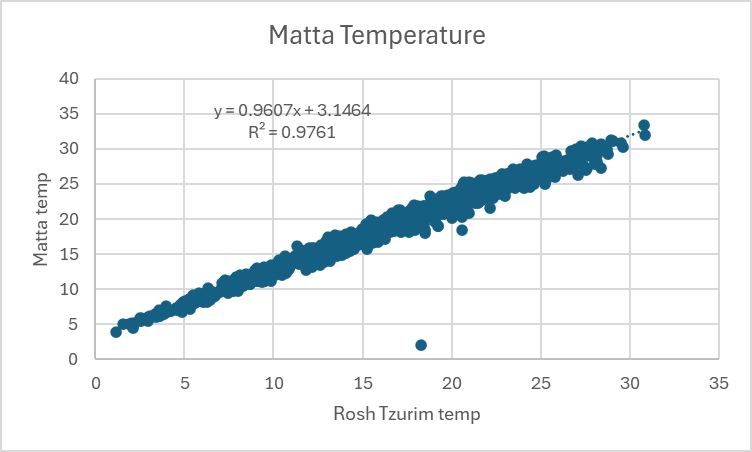
* We will supplement the missing temperature values from 2014-2020 in the matta data from rosh tzurim hourly average temperature values, these need to be adjusted according to the transformation extracted frm the linear regression.
the average temps and daily min max temps need to be extracted from hourly temperature values of each day.

* with linear regression we recieved the following correlation between daily precipitation in matta and daily precipitation in tzur hadasa:
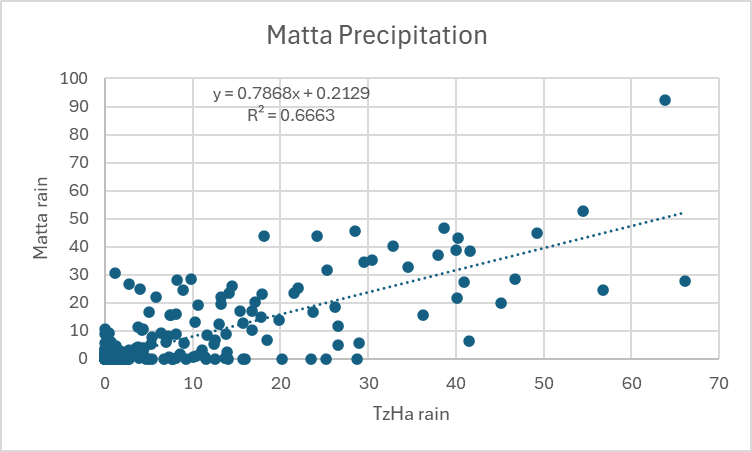

* We will supplement the missing precipitation values from 2014-2020 in the matta data from tzur hadassah daily precipitation values, these need to be adjusted according to the transformation extracted frm the linear regression. this we will apply after yearly aggregation

In [ ]:
#extract daily average temp from hourly average temps of each day of rosh tzurim
df_hourly_temp_Rtz_2014_2021.columns=["st","Time","Temp"]
df_hourly_temp_Rtz_2014_2021.drop(columns='st',inplace=True)
df_hourly_temp_Rtz_2014_2021['Time'] = pd.to_datetime(df_hourly_temp_Rtz_2014_2021['Time'],dayfirst=True)

df_hourly_temp_Rtz_2014_2021['Time'] = pd.to_datetime(df_hourly_temp_Rtz_2014_2021['Time'],dayfirst=True)
df_hourly_temp_Rtz_2014_2021['Time']=df_hourly_temp_Rtz_2014_2021['Time'].dt.date
aggregated_data = df_hourly_temp_Rtz_2014_2021.groupby('Time').agg(
    avg_temp=('Temp', 'mean')
)

df_temp_Rtz_2014_2021.columns=['st','Date','max_temp','min_temp']
df_temp_Rtz_2014_2021.drop(columns='st',inplace=True)

df_temp_Rtz_2014_2021['Date'] = pd.to_datetime(df_temp_Rtz_2014_2021['Date'],dayfirst=True)
df_temp_Rtz_2014_2021.index=df_temp_Rtz_2014_2021['Date']
df_temp_Rtz_2014_2021.drop(columns='Date',inplace=True)
df_temp_Rtz_2014_2021['avg_temp']=aggregated_data['avg_temp']

df_rain_tzH_2014_2021.columns = ['statio','Date','rainfall']
df_rain_tzH_2014_2021.drop(columns='statio',inplace=True)
df_rain_tzH_2014_2021.index=pd.to_datetime(df_rain_tzH_2014_2021['Date'],dayfirst=True)
df_rain_tzH_2014_2021.drop(columns='Date',inplace=True)

df_climate_2014_2021=pd.merge(df_temp_Rtz_2014_2021,df_rain_tzH_2014_2021, how="outer",on='Date')

df_climate_2014_2021['rainfall']=df_climate_2014_2021['rainfall'].fillna(0)
df_climate_2014_2021=df_climate_2014_2021.apply(pd.to_numeric,errors='coerce')
df_climate_2014_2021.iloc[:,:3]=df_climate_2014_2021.iloc[:,:3].apply(lambda x: x*0.9607+3.1464)

##Function for Calculation of VPD:

Air can only hold a certain amount of water vapor at a given temperature before it starts condensing back to liquid water (in forms such as dew or rain). The maximum amount of water vapor that air can hold at a certain temperature is called “saturation vapor pressure” or SVP.
first we calculate svp as follows:



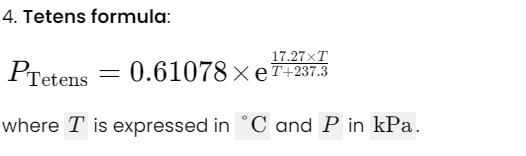

Similarly, the current actual amount of water vapor in the air is called the “actual vapor pressure” or AVP.

AVP / SVP x 100 = RH%

RH is the proportion of water the air is currently holding vs. its maximum capacity. This is defined as “Relative” humidity.

thus we can calculate AVP from the relative humidity as follows:


AVP= (RH x SVP)X1/100

the vapor pressure deficit is the difference between the actual vapor pressure and the maximum vapor pressure in the air at the current temp.
In general hot air has a higher capacity for vapor retention, its SVP is larger than cold air.

VPD = SVP – AVP

In [ ]:
def calc_vpd(avg_tmp, rh):

  svp=0.6108*np.exp(avg_tmp*17.27/(237.27+avg_tmp))
  avp= (svp*rh)/100
  vpd=svp-avp
  return vpd


##Reformat Relative Humidity Data

with linear regression we recieved the following correlation between relative humidity in matta and relative humidity in rosh tzurim:
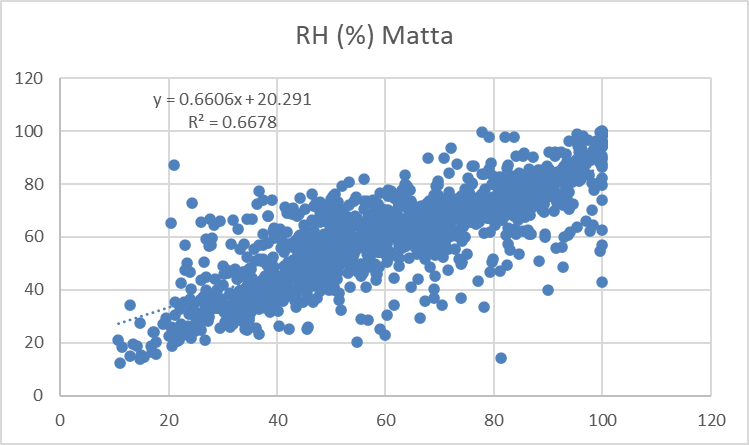

We will supplement the missing RH values in the matta data, from 2004-2011 and from 2015-2020 with the relative humidity in rosh tzurim after transformation according to the equation extracted from the linear regression

In [ ]:
df_Rtz_RH_2003_2024['Date']=pd.to_datetime(df_Rtz_RH_2003_2024['Date'],dayfirst=True)
df_Rtz_RH_2003_2024.index=df_Rtz_RH_2003_2024['Date']
df_Rtz_RH_2003_2024.drop(columns=['Date','Rosh Tzurim Daily average RH (%)'],inplace=True)
df_Rtz_RH_2003_2024=df_Rtz_RH_2003_2024.apply(pd.to_numeric,errors='coerce')
df_Rtz_RH_2003_2024.columns=['RH']


#max precip rate is only recorded in 2021-2024 data set we will leave only columns common to all datasets
df_climate_2021_2024.drop(columns='max_precipitation_rate',inplace=True)
#make column names identical for all datasets:
df_climate_2014_2021=df_climate_2014_2021.iloc[:,[3,2,0,1]]
df_climate_2003_2014= df_climate_2003_2014.set_axis(['rainfall', 'avg_temp', 'max_temp', 'min_temp', 'RH'],axis=1)

#first deal with years with only RH values:
df_climate1=pd.concat([df_climate_2003_2014,df_climate_2014_2021])
#use matta RH values , where there are null values supplement with rosh tzurim adjusted values
result=pd.merge(df_climate1,df_Rtz_RH_2003_2024,on= 'Date')
result['RH']=result['RH'] = result['RH_x'].fillna(result['RH_y'])
result.drop(columns=['RH_x','RH_y'],inplace=True)

#Calculate vpd from rh and average temperature
#convert RH into VPD:
result['avg_temp'] = pd.to_numeric(result['avg_temp'], errors='coerce')
result['RH'] = pd.to_numeric(result['RH'], errors='coerce')
#this asumes 200 meters above sea level
vpd=calc_vpd(result['avg_temp'],result['RH'])
result['VPD']=vpd
climate_2003_2021=result.iloc[:,[0,1,2,3,5]]
climate_2003_2021.columns=['rainfall','avg_temp','max_temp','min_temp','VPD']

frames=[climate_2003_2021,df_climate_2021_2024]
df_climate=pd.concat(frames)



In [ ]:
df_climate

,rainfall,avg_temp,max_temp,min_temp,VPD
Date,,,,,
2003-09-01,0,26.022700,32.77,19.71,1.279601
2003-09-02,0,28.548400,34.85,20.92,2.482662
2003-09-03,0,27.237400,33.61,20.49,2.067140
2003-09-04,0,25.513600,31.46,19.6,0.936789
2003-09-05,0,23.931800,28.41,17.79,0.717387
...,...,...,...,...,...
2024-11-20,0.2,15.779167,22.3,12.3,0.486667
2024-11-21,0.0,16.741667,23.9,12.5,0.744792
2024-11-22,0.0,19.100000,24.3,14.2,1.217917


#Combining the datasets and Extracting the climate indices

Extract the following climate indices for each time period:
* Cummulative precipitation- total sum of all daily precipitation values
* Simple Daily Intensity Index (SDII): Cummulative precipitation/number of rainy days

* Average temperature
* no. of consecutive dry days
* no. of consecutive wet days
* no. of rain events if an rain event was seperated by one day from another rain event this was calculated as one rain event in total.
* Average difference between daily Tmin and Tmax (DTR)
*Average VPD (calculated as listed above)
* Cummulative precipitation of previous year.


The climate indices are extracted in two different time frames:

* Hydrological Climate indices: the climate indices calculated only from the hydrological year. The period of time commonly used for which precipitation totals are measured this is the period of time with the highest correlation between precipitation and negligible changes in storage (soil water).We defined a hydrological year from October to April

* Seasonal climate indices extracted seperatly according to each season which we defined as follows- Autumn : october-November, Winter: december-feburary, Spring: march-april


In [ ]:
df_climate.to_csv("/content/drive/MyDrive/Colab Notebooks/matta_climate_2002_2024.csv")

In [ ]:
# find the growing year for each day, the biomass is weighed on april so the growing year that effects the biomass of each year are the 12 months preceeding april
df_climate.index= pd.to_datetime(df_climate.index,dayfirst=True)
# Use list comprehension to apply dt accessor on individual Timestamp objects within the index
df_climate['growing_year'] = [date.year if date.month <= 4 else date.year + 1 for date in df_climate.index]
#find the season of each day autumn is october-November winter is december to feburary and spring is march to april
autumn=[10,11]
winter=[12,1,2]
spring=[3,4]
df_climate['season']=['Winter' if date.month in winter else 'Autumn' if date.month in autumn else 'Spring' if date.month in spring else None for date in df_climate.index ]


df_climate['rainfall'] = pd.to_numeric(df_climate['rainfall'], errors='coerce')
df_climate['avg_temp'] = pd.to_numeric(df_climate['avg_temp'], errors='coerce')
df_climate['max_temp'] = pd.to_numeric(df_climate['max_temp'], errors='coerce')
df_climate['min_temp'] = pd.to_numeric(df_climate['min_temp'], errors='coerce')
df_climate['min_max_diff']= df_climate['max_temp']-df_climate['min_temp']

#find rainy days, filter out rainy days wwith less then 1mm of rain
df_climate['is_rainy']=np.where(df_climate['rainfall']>1,1,0)

#calculate consecutive rainy and dry days and number of continous rain events
df_climate['consecutive_dry_days'] = np.where(
    df_climate["is_rainy"].eq(0),
    df_climate.groupby(df_climate.is_rainy.ne(df_climate.is_rainy.shift()).cumsum()).cumcount() + 1,
    np.nan,
)

df_climate['consecutive_rainy_days'] = np.where(
    df_climate['is_rainy'].eq(1),
    df_climate.groupby(df_climate.is_rainy.ne(df_climate.is_rainy.shift()).cumsum()).cumcount() + 1,
    np.nan,
)

df_climate['rain_event']=np.where(df_climate['consecutive_rainy_days'].eq(1),1,0)

#adjust number of rain events so that if two rain events are seperated by one day they are a single rain event
for i in range(len(df_climate.index)-2):
  if df_climate.iloc[i,8]==1:
    df_climate.iloc[i+2,8]=0

#leave only values of days within a hydrological year october-april
df_climate_full=df_climate
df_climate=df_climate[~df_climate.season.isnull()]

df_climate_full: this is the yearly climate data ungrouped by year

df_climate: this is the hydrological year climate data ungrouped by year

In [ ]:
df_climate_full

,rainfall,avg_temp,max_temp,min_temp,VPD,growing_year,season,min_max_diff,is_rainy,consecutive_dry_days,consecutive_rainy_days,rain_event
Date,,,,,,,,,,,,
2003-09-01,0.0,26.022700,32.77,19.71,1.279601,2004,None,13.06,0,1.0,NaN,0
2003-09-02,0.0,28.548400,34.85,20.92,2.482662,2004,None,13.93,0,2.0,NaN,0
2003-09-03,0.0,27.237400,33.61,20.49,2.067140,2004,None,13.12,0,3.0,NaN,0
2003-09-04,0.0,25.513600,31.46,19.60,0.936789,2004,None,11.86,0,4.0,NaN,0
2003-09-05,0.0,23.931800,28.41,17.79,0.717387,2004,None,10.62,0,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20,0.2,15.779167,22.30,12.30,0.486667,2025,Autumn,10.00,0,1.0,NaN,0
2024-11-21,0.0,16.741667,23.90,12.50,0.744792,2025,Autumn,11.40,0,2.0,NaN,0
2024-11-22,0.0,19.100000,24.30,14.20,1.217917,2025,Autumn,10.10,0,3.0,NaN,0


In [ ]:
df_full_yearly_climate_data=df_climate_full.groupby('growing_year').agg(cummulative_precipitation=('rainfall','sum'),
                                                                                            average_temperature=('avg_temp','mean'),
                                                                                            DTR=('min_max_diff','mean'),
                                                                                            total_rainy_days=('is_rainy','sum'),
                                                                                            consecutive_dry_days=('consecutive_dry_days','max'),
                                                                                            consecutive_rainy_days=('consecutive_rainy_days','max'),
                                                                                            number_of_rain_events=('rain_event','sum'), VPD=('VPD','mean')

                                                                                            )
df_seasonal_climate_data=df_climate.groupby(['growing_year','season']).agg(cummulative_precipitation=('rainfall','sum'),
                                                                                            average_temperature=('avg_temp','mean'),
                                                                                            DTR=('min_max_diff','mean'),
                                                                                            total_rainy_days=('is_rainy','sum'),
                                                                                            consecutive_dry_days=('consecutive_dry_days','max'),
                                                                                            consecutive_rainy_days=('consecutive_rainy_days','max'),
                                                                                            number_of_rain_events=('rain_event','sum'),VPD=('VPD','mean')

                                                                                            )
df_seasonal_climate_data['consecutive_rainy_days']=df_seasonal_climate_data['consecutive_rainy_days'].fillna(0)
df_seasonal_climate_data['consecutive_dry_days']=df_seasonal_climate_data['consecutive_dry_days'].fillna(0)

df_yearly_climate_data=df_climate.groupby('growing_year').agg(cummulative_precipitation=('rainfall','sum'),
                                                                                            average_temperature=('avg_temp','mean'),
                                                                                            DTR=('min_max_diff','mean'),
                                                                                            total_rainy_days=('is_rainy','sum'),
                                                                                            consecutive_dry_days=('consecutive_dry_days','max'),
                                                                                            consecutive_rainy_days=('consecutive_rainy_days','max'),
                                                                                            number_of_rain_events=('rain_event','sum'),VPD=('VPD','mean')


                                                                                            )



In [ ]:
Previous_year_precipitation=df_yearly_climate_data['cummulative_precipitation'].shift(1)
df_yearly_climate_data['previous_year_precipitation']=Previous_year_precipitation

Previous_year_precipitation=df_full_yearly_climate_data['cummulative_precipitation'].shift(1)
df_full_yearly_climate_data['previous_year_precipitation']=Previous_year_precipitation

previous_year_DTR =df_yearly_climate_data['DTR'].shift(1)
df_yearly_climate_data['previous_year_DTR']=previous_year_DTR

previous_year_DTR =df_full_yearly_climate_data['DTR'].shift(1)
df_full_yearly_climate_data['previous year DTR']=previous_year_DTR

previous_year_VPD =df_yearly_climate_data['VPD'].shift(1)
df_yearly_climate_data['previous_year_VPD']=previous_year_VPD

previous_year_VPD =df_full_yearly_climate_data['VPD'].shift(1)
df_full_yearly_climate_data['previous year VPD']=previous_year_VPD

previous_year_rainy_days =df_yearly_climate_data['total_rainy_days'].shift(1)
df_yearly_climate_data['previous_year_rainy_days']=previous_year_rainy_days

previous_year_rainy_days =df_full_yearly_climate_data['total_rainy_days'].shift(1)
df_full_yearly_climate_data['previous year rainy days']=previous_year_rainy_days

df_yearly_climate_data: this is the hydrological yearly climate data grouped by year

df_full_yearly_climate_data: this is the yearly climate data grouped by year

#Climate and seed bank Correleation

##Reformat 2002-2010 biomass data:
all final values of biomass will formated to g/m^2

In [ ]:
#extract only relevant columns and rows
df_biomass_2002_2010.columns=df_biomass_2002_2010.iloc[6]
df_biomass_2002_2010=df_biomass_2002_2010.iloc[7:,:]
df_biomass_2002_2010.drop([7],axis=0,inplace=True)
df_biomass_2002_2010.reset_index(drop=True,inplace=True)

#calculate total biomass
df_biomass_2002_2010.iloc[:,5:]= df_biomass_2002_2010.iloc[:,5:].apply(pd.to_numeric,errors='coerce')
df_biomass_2002_2010_total=df_biomass_2002_2010.iloc[:,:5]
df_biomass_2002_2010_total['Biomass']=df_biomass_2002_2010.iloc[:,5:].sum(axis=1)

#convert Biomass values fromn g/0.2x0.2m to g/m^2:
df_biomass_2002_2010_total['Biomass']=df_biomass_2002_2010_total['Biomass']*25
df_biomass_2002_2010=df_biomass_2002_2010_total
df_biomass_2002_2010.drop(columns=['Site'],inplace=True)

df_biomass_2002_2010['ID']=df_biomass_2002_2010['Plot'].astype(str)+df_biomass_2002_2010['Repl'].astype(str)
df_biomass_2002_2010.drop(columns=['Plot','Repl'],inplace=True)

df_biomass_2002_2010=df_biomass_2002_2010.iloc[:,[3,0,1,2]]


<ipython-input-207-d23268e97555>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biomass_2002_2010.drop([7],axis=0,inplace=True)
<ipython-input-207-d23268e97555>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biomass_2002_2010_total['Biomass']=df_biomass_2002_2010.iloc[:,5:].sum(axis=1)
<ipython-input-207-d23268e97555>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

##Reformat 2018-2024 biomass data

In [ ]:
#extract only relevant columns and rows
df_biomass_2018_2024=df_biomass_2018_2024.loc[df_biomass_2018_2024["Year"].notnull()]
df_biomass_2018_2024_new=df_biomass_2018_2024.iloc[:,:5]
df_biomass_2018_2024_new['Biomass']=df_biomass_2018_2024.loc[:,'Biomass [per m²]'].apply(pd.to_numeric,errors='coerce')
df_biomass_2018_2024=df_biomass_2018_2024_new

df_biomass_2018_2024['Plot']=df_biomass_2018_2024['Plot'].astype(int)
df_biomass_2018_2024['Repetition']=df_biomass_2018_2024['Repetition'].astype(int)
df_biomass_2018_2024['ID']=df_biomass_2018_2024['Plot'].astype(str)+df_biomass_2018_2024['Block'].astype(str)+df_biomass_2018_2024['Repetition'].astype(str)
df_biomass_2018_2024.drop(columns=['Plot','Block','Repetition'],inplace=True)
df_biomass_2018_2024=df_biomass_2018_2024.iloc[:,[3,0,1,2]]

df_biomass_2011_2017= df_biomass_2011_2017.T
df_biomass_2011_2017.columns=df_biomass_2011_2017.iloc[0]
df_biomass_2011_2017.drop(df_biomass_2011_2017.index[0],inplace=True)
df_biomass_2011_2017['Year']=df_biomass_2011_2017.index
df_biomass_2011_2017.reset_index(drop=True,inplace=True)

Treatment=['D']*7+['C']*7+['I']*4
Year=[2011,2012,2013,2014,2015,2016,2017]*2+[2011,2012,2013,2014]
Biomass=df_biomass_2011_2017['Drought'].tolist()+df_biomass_2011_2017['Control'].tolist()+df_biomass_2011_2017['Irrigation'].tolist()
df_biomass_2011_2017=pd.DataFrame({'Treatment':Treatment,'Year':Year,'Biomass':Biomass[:-3]})
df_biomass_2011_2017['ID']=df_biomass_2011_2017.index
df_biomass_2011_2017=df_biomass_2011_2017.iloc[:,[3,1,0,2]]

Biomass 2002-2010:
15 plots 5 per treatment 3 treatments I,C,D 10 replications per plot
Sampling: ca 10 quadrates in each of 5 plots  - 20 x 20 cm quadrates

Biomass 2011-2017- the mean of all plots and replications per year per treatment 3 treatments D, I, C

Biomass 2018-2024 5 Blocks 4 plots(Treatments) per Block 5 Replications per plot (one treatment per plot or 4 treatments per block)
D33,D66-HF,D66-LF,C
from 2021 all D33 treatments were changed to D66 treatments

##Combine Biomass Dataframes

In [ ]:
df_biomass_2002_2010.columns=df_biomass_2018_2024.columns
frames=[df_biomass_2002_2010,df_biomass_2011_2017,df_biomass_2018_2024]
df_biomass=pd.concat(frames)
df_biomass.reset_index(drop=True,inplace=True)
df_biomass=df_biomass.dropna(subset=['Year'])

In [ ]:
df_biomass.to_csv("/content/drive/MyDrive/Colab Notebooks/matta_biomass_2002_2024.csv")

#Biomass SeedBank Correlation

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
biomass_seed_df=df_seed_bank.groupby(['Year','Treatment']).mean()

In [ ]:
#biomass_seed_df.to_csv("/content/drive/MyDrive/Colab Notebooks/matta_biomass_and_seed_bank_2002_2010.csv")

<ipython-input-214-f1cd034a8311>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model_sm.pvalues[1]
<ipython-input-214-f1cd034a8311>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model_sm.pvalues[1]
<ipython-input-214-f1cd034a8311>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model_sm.pvalues[1]
<ipython-input-214-f1cd034a8311>:22: FutureWarning: Series.__getitem__ treating keys as positions

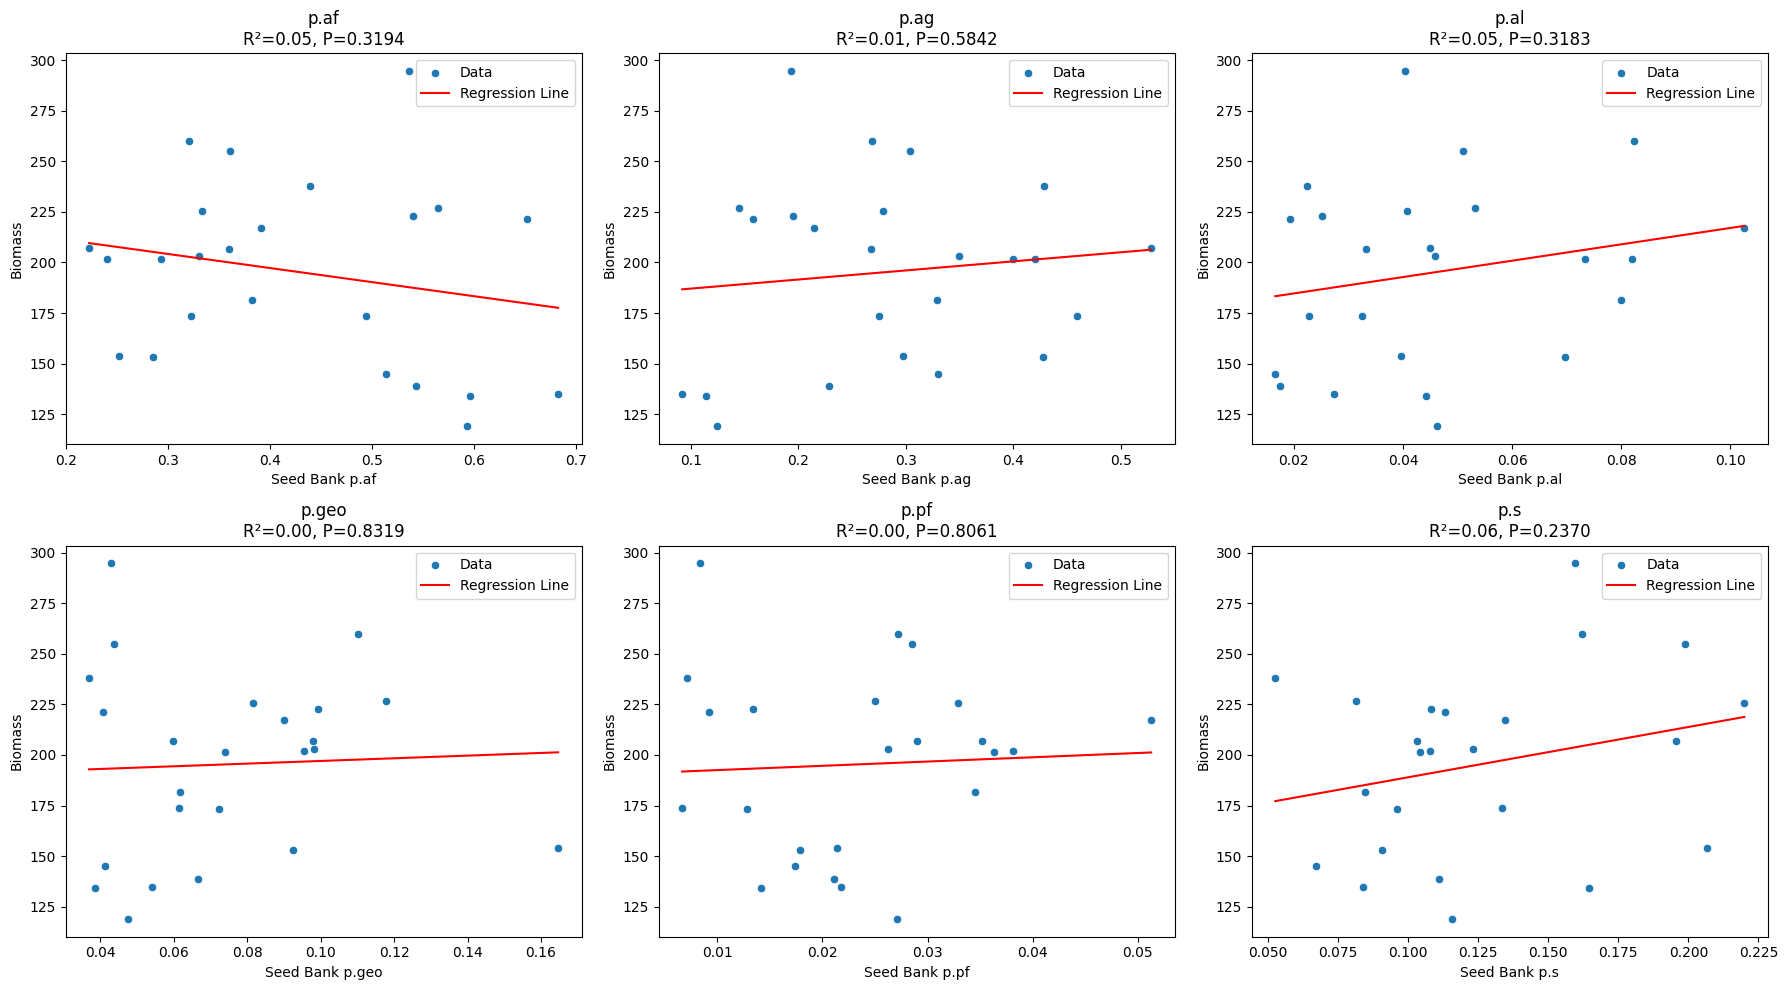

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/biomass_seedbank_regression.jpeg


In [ ]:
import os

# Define the save path in Google Drive
save_dir = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results"
os.makedirs(save_dir, exist_ok=True)
jpeg_path = os.path.join(save_dir, "biomass_seedbank_regression.jpeg")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, i in enumerate(range(13, 19)):
    X = biomass_seed_df.iloc[:, i].values.reshape(-1, 1)
    Y = biomass_seed_df[['Biomass']]

    model = LinearRegression().fit(X, Y)
    Y_pred = model.predict(X)

    r_squared = r2_score(Y, Y_pred)
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(Y, X_sm).fit()
    p_value = model_sm.pvalues[1]

    p_val_str = f"{p_value:.4e}" if p_value < 0.0001 else f"{p_value:.4f}"
    title = f"{biomass_seed_df.columns[i]}\nR²={r_squared:.2f}, P={p_val_str}"

    ax = axes[idx]
    sns.scatterplot(x=X.flatten(), y=Y['Biomass'], ax=ax, label="Data")
    sns.lineplot(x=X.flatten(), y=Y_pred.flatten(), color='red', ax=ax, label="Regression Line")
    ax.set_title(title)
    ax.set_xlabel(f"Seed Bank {biomass_seed_df.columns[i]}")
    ax.set_ylabel("Biomass")

plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


<ipython-input-215-24af121a9acb>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model_sm.pvalues[1]


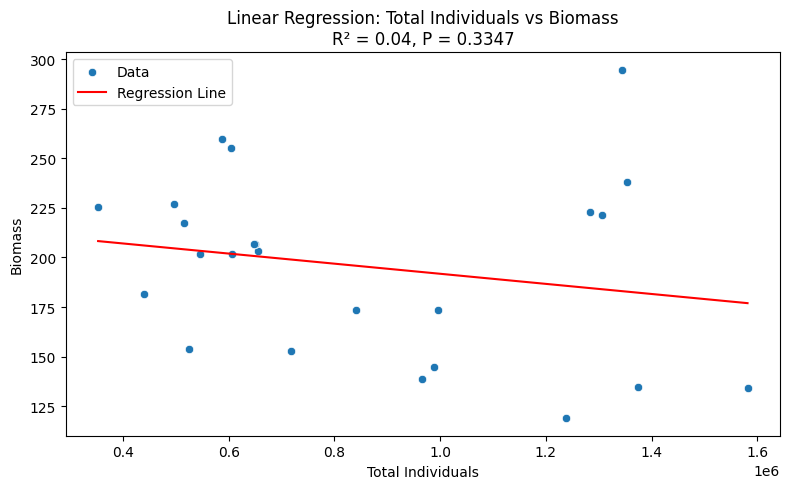

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/total_individuals_regression.jpeg


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Input data
X = biomass_seed_df[['Total Individuals']]
Y = biomass_seed_df[['Biomass']]

# Fit regression model
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)

# R² and p-value
r_squared = r2_score(Y, Y_pred)
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
p_value = model_sm.pvalues[1]

# Format title
p_val_str = f"{p_value:.4e}" if p_value < 0.0001 else f"{p_value:.4f}"
title = f"Linear Regression: Total Individuals vs Biomass\nR² = {r_squared:.2f}, P = {p_val_str}"

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Total Individuals'], y=Y['Biomass'], label="Data")
sns.lineplot(x=X['Total Individuals'], y=Y_pred.flatten(), color='red', label="Regression Line")
plt.title(title)
plt.xlabel('Total Individuals')
plt.ylabel('Biomass')
plt.legend()

# Save to Google Drive (same folder as Excel)
jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/total_individuals_regression.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


we need to remove the last three values in biomass and the first three values of total individuals

In [ ]:
X=biomass_seed_df[['Biomass']]
Y=biomass_seed_df[['Total Individuals']]

X = X[:-3].to_numpy()
Y = Y[3:].to_numpy()


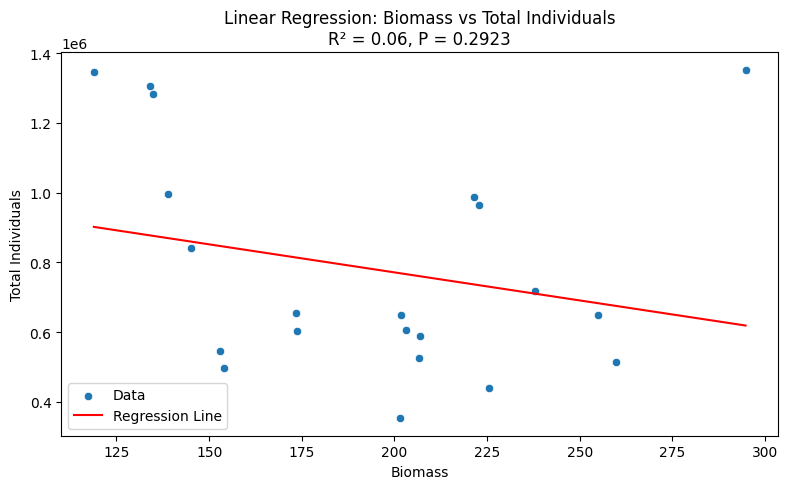

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/biomass_vs_total_individuals.jpeg


In [ ]:

# Fit the model
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)

# R-squared
r_squared = r2_score(Y, Y_pred)

# P-value
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
p_value = model_sm.pvalues[1]

# Format statistics
p_val_str = f"{p_value:.4e}" if p_value < 0.0001 else f"{p_value:.4f}"
title = f"Linear Regression: Biomass vs Total Individuals\nR² = {r_squared:.2f}, P = {p_val_str}"

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.flatten(), y=Y.flatten(), label="Data")
sns.lineplot(x=X.flatten(), y=Y_pred.flatten(), color='red', label="Regression Line")
plt.title(title)
plt.xlabel('Biomass')
plt.ylabel('Total Individuals')
plt.legend()

# Save path
jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/biomass_vs_total_individuals.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")

#Combine Biomass Treatment Data with Climate Data

df_climate_full: this is the yearly climate data ungrouped by year

df_climate: this is the hydrological year climate data ungrouped by year

df_yearly_climate_data: this is the hydrological yearly climate data grouped by year

df_full_yearly_climate_data: this is the yearly climate data grouped by year

rename the dataframes:

we have the climate indices calculated from the full year-**df_climate_full**

the climate indices calculated each year only from the growing months called a hydrological year-**df_climate**

the climate data which calculates each indice by season each year-**df_climate_seasonal**

In [ ]:
#rename the dataframes:
#we have the climate indices calculated from the full year-df_climate_full
# the climate indices calculated each year only from the growing months-df_climate
# the climate data which calculates each indice by season each year-df_climate_seasonal
df_climate_daily=df_climate.copy()
df_climate=df_yearly_climate_data
df_climate_full=df_full_yearly_climate_data
df_climate_seasonal=df_seasonal_climate_data

#create year and season column for seasonal climate data
df_climate_seasonal['Year']=df_climate_seasonal.index.get_level_values('growing_year')
df_climate_seasonal['season']=df_climate_seasonal.index.get_level_values('season')
#create year column for yearly climate data
df_climate['Year']=df_climate.index
df_climate_full['Year']=df_climate_full.index

df_biomass['Year']=df_biomass['Year'].astype(int)
df_climate['Year']=df_climate['Year'].astype(int)
df_climate_full['Year']=df_climate_full['Year'].astype(int)
df_climate_seasonal['Year']=df_climate_seasonal['Year'].astype(int)
merged_yearly= pd.merge(df_biomass,df_climate, how="left",on='Year')
merged_yearly.dropna(subset=['cummulative_precipitation'],inplace=True)
merged_yearly.dropna(subset=['Treatment'],inplace=True)
merged_yearly.dropna(subset=['previous_year_precipitation'],inplace=True)

merged_full= pd.merge(df_biomass,df_climate_full, how="left",on='Year')
merged_full.dropna(subset=['cummulative_precipitation'],inplace=True)
merged_full.dropna(subset=['Treatment'],inplace=True)

merged_seasonal= pd.merge(df_biomass,df_climate_seasonal, how="left",on='Year')
merged_seasonal.dropna(subset=['cummulative_precipitation'],inplace=True)
merged_seasonal.dropna(subset=['Treatment'],inplace=True)
merged_seasonal.dropna(subset=['season'],inplace=True)

**merged_yearly**: Biomass and climate data of hydrological year

#Adjust yearly climate indices for each treatment

* we will adjust the cummulative precipitation values as follows:
D and D33 will be 0.66 of the yearly precipitation value
D66-NF will be 0.33 of the yearly precipitation values
C will be the unchanged yearly precipitation value
D66-LF, D66-HF are 180 every year
I aded to cummulative precipitation 180

* adjust total_rainy days:
I treatment has natural amount of rainy day
 D66-HF treatment has 9 rainy days
D66-LF treatment has 3 rainy days
D, D33, D66, C, D66-NF have natural amount of rainy days

* add SDII drought level and frequency columns

##Adjust the Hydrological Indices

In [ ]:
#we will adjust the climate indices case by case according to treatment

#'D' and 'D33'
drought_values1=merged_yearly['Treatment']=='D'
drought_values2=merged_yearly['Treatment']=='D33'
drought_val=drought_values1|drought_values2

#'C' control
control_val=merged_yearly['Treatment']=='C'

#'I' irrigation
Irrigation_val= merged_yearly['Treatment']=='I'

# 'D66-NF' or 'D66'
d66_nf_val1=merged_yearly['Treatment']=='D66-NF'
d66_nf_val2=merged_yearly['Treatment']=='D66'
d66_nf_val=d66_nf_val1|d66_nf_val2

# 'D66-LF'
d66_lf_val1=merged_yearly['Treatment']=='D66-LF'
d66_lf_val2=merged_yearly['Treatment']=='D66- LF'
d66_lf_val=d66_lf_val1|d66_lf_val2

# 'D66-HF'
d66_hf_val1=merged_yearly['Treatment']=='D66-HF'
d66_hf_val2=merged_yearly['Treatment']=='D66- HF'
d66_hf_val=d66_hf_val1|d66_hf_val2


#we will adjust the cummulative precipitation values according to treatment:
#D and D33 will be 0.66 of the yearly precipitation value
merged_yearly.loc[drought_val,'cummulative_precipitation']=merged_yearly.loc[drought_val,'cummulative_precipitation']*0.66
merged_yearly.loc[drought_val,'previous_year_precipitation']=merged_yearly.loc[drought_val,'previous_year_precipitation']*0.66

#D66-NF will be 0.33 of the yearly precipitation values
merged_yearly.loc[d66_nf_val,'cummulative_precipitation']=merged_yearly.loc[d66_nf_val,'cummulative_precipitation']*0.33
merged_yearly.loc[d66_nf_val,'previous_year_precipitation']=merged_yearly.loc[d66_nf_val,'previous_year_precipitation']*0.33

#C will be the unchanged yearly precipitation value
merged_yearly.loc[control_val,'cummulative_precipitation']=merged_yearly.loc[control_val,'cummulative_precipitation']
merged_yearly.loc[control_val,'previous_year_precipitation']=merged_yearly.loc[control_val,'previous_year_precipitation']

#D66-LF, D66-HF are 180 every year
d66_lf_hf=d66_lf_val|d66_hf_val
merged_yearly.loc[d66_lf_hf,'cummulative_precipitation']=180
merged_yearly.loc[d66_lf_hf,'previous_year_precipitation']=180

#I aded to cummulative precipitation 180
merged_yearly.loc[Irrigation_val,'cummulative_precipitation']=merged_yearly.loc[Irrigation_val,'cummulative_precipitation']+180
merged_yearly.loc[Irrigation_val,'previous_year_precipitation']=merged_yearly.loc[Irrigation_val,'previous_year_precipitation']+180

#adjust total_rainy days:
# I treatment has natural amount of rainy days
# D, D33, D66, C, D66-NF have natural amount of rainy days
# D66-HF treatment has 9 rainy days
merged_yearly.loc[d66_hf_val,'total_rainy_days']=9
merged_yearly.loc[d66_hf_val,'previous_year_rainy_days']=9
# D66-LF treatment has 3 rainy days
merged_yearly.loc[d66_lf_val,'total_rainy_days']=3
merged_yearly.loc[d66_lf_val,'previous_year_rainy_days']=3


#add SDII calculated
merged_yearly['SDII']=merged_yearly['cummulative_precipitation']/merged_yearly['total_rainy_days']
merged_yearly['previous year SDII']= merged_yearly['previous_year_precipitation']/merged_yearly['previous_year_rainy_days']

#add drought level and frequency:

merged_yearly['Drought']=np.nan
merged_yearly['Frequency']=np.nan

merged_yearly.loc[Irrigation_val,'Drought']=1.33
merged_yearly.loc[Irrigation_val,'Frequency']='NF'

merged_yearly.loc[drought_val,'Drought']=0.66
merged_yearly.loc[drought_val,'Frequency']='NF'

merged_yearly.loc[control_val,'Drought']=1
merged_yearly.loc[control_val,'Frequency']='NF'

merged_yearly.loc[d66_hf_val,'Drought']=0.33
merged_yearly.loc[d66_hf_val,'Frequency']='HF'

merged_yearly.loc[d66_lf_val,'Drought']=0.33
merged_yearly.loc[d66_lf_val,'Frequency']='LF'


merged_yearly.loc[d66_nf_val,'Drought']=0.33
merged_yearly.loc[d66_nf_val,'Frequency']='NF'

merged_yearly.dropna(subset=['Frequency'],inplace=True)



<ipython-input-219-91f25db76112>:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_yearly.loc[Irrigation_val,'Frequency']='NF'


In [ ]:
merged_yearly

,ID,Year,Treatment,Biomass,cummulative_precipitation,average_temperature,DTR,total_rainy_days,consecutive_dry_days,consecutive_rainy_days,number_of_rain_events,VPD,previous_year_precipitation,previous_year_DTR,previous_year_VPD,previous_year_rainy_days,SDII,previous year SDII,Drought,Frequency
449,11,2006,D,139.125,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.3981,0.66,NF
450,12,2006,D,42.15,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.3981,0.66,NF
451,13,2006,D,102.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.3981,0.66,NF
452,14,2006,D,208.025,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.3981,0.66,NF
453,15,2006,D,120.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.3981,0.66,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,24E2,2024,D66-HF,59.76,180.000,16.503787,10.288732,9.0,35.0,5.0,22.0,0.765912,180.000,9.816981,0.689479,9.0,20.000000,20.0000,0.33,HF
2153,24E3,2024,D66-HF,64.44,180.000,16.503787,10.288732,9.0,35.0,5.0,22.0,0.765912,180.000,9.816981,0.689479,9.0,20.000000,20.0000,0.33,HF
2154,24E4,2024,D66-HF,69.64,180.000,16.503787,10.288732,9.0,35.0,5.0,22.0,0.765912,180.000,9.816981,0.689479,9.0,20.000000,20.0000,0.33,HF
2155,24E5,2024,D66-HF,56.56,180.000,16.503787,10.288732,9.0,35.0,5.0,22.0,0.765912,180.000,9.816981,0.689479,9.0,20.000000,20.0000,0.33,HF


**merged_yearly_grouped**: climate and biomass data of hydrological year grouped by year

In [ ]:


merged_yearly_grouped= merged_yearly.groupby(['Year','Treatment']).agg(
    Biomass=('Biomass','mean'),
    cummulative_precipitation=('cummulative_precipitation','first'),
    average_temperature=('average_temperature','first'),
    DTR=('DTR','first'),
    total_rainy_days=('total_rainy_days','first'),
    consecutive_dry_days=('consecutive_dry_days','first'),
    consecutive_rainy_days=('consecutive_rainy_days','first'),
    number_of_rain_events=('number_of_rain_events','first'),
    SDII=('SDII','first'),
    VPD=('VPD','first'),
    Drought=('Drought','first'),
    Frequency=('Frequency','first'),
    previous_year_precipitation=('previous_year_precipitation','first'),
    previous_year_DTR=('previous_year_DTR','first'),
    previous_year_VPD=('previous_year_VPD','first'),
    previous_year_SDII=('previous year SDII','first'),
    previous_year_rainy_days=('previous_year_rainy_days','first')
)

#merged_yearly_grouped.dropna(inplace=True)

# create a dataframe containing only natural frequency treatments with yearly climate indices:
nf_values_df=merged_yearly_grouped[merged_yearly_grouped['Frequency'] == 'NF']



In [ ]:
merged_yearly_grouped

Biomass  cummulative_precipitation  average_temperature  \
Year Treatment                                                               
2006 C           173.49898                    419.800            13.749445   
     D          173.706373                    277.068            13.749445   
     I          153.024038                    599.800            13.749445   
2007 C          203.170588                    581.700            13.337655   
     D             254.979                    383.922            13.337655   
...                    ...                        ...                  ...   
2023 D66-NF      54.741467                    246.774            15.316314   
2024 C          115.634667                    539.600            16.503787   
     D66-HF     133.129333                    180.000            16.503787   
     D66-LF      72.194667                    180.000            16.503787   
     D66-NF      83.393333                    178.068            16.503787   

                      DTR  total_rainy_days  consecutive_dry_days  \
Year Treatment                                                      
2006 C           9.559919              26.0                  52.0   
     D           9.559919              26.0                  52.0   
     I           9.559919              26.0                  52.0   
2007 C          10.635186              30.0                 181.0   
     D          10.635186              30.0                 181.0   
...                   ...               ...                   ...   
2023 D66-NF      9.816981              30.0                 209.0   
2024 C          10.288732              31.0                  35.0   
     D66-HF     10.288732               9.0                  35.0   
     D66-LF     10.288732               3.0                  35.0   
     D66-NF     10.288732              31.0                  35.0   

                consecutive_rainy_days  number_of_rain_events       SDII  \
Year Treatment                                                             
2006 C                             5.0                   16.0  16.146154   
     D                             5.0                   16.0  10.656462   
     I                             5.0                   16.0  23.069231   
2007 C                             4.0                   22.0  19.390000   
     D                             4.0                   22.0  12.797400   
...                                ...                    ...        ...   
2023 D66-NF                       10.0                   17.0   8.225800   
2024 C                             5.0                   22.0  17.406452   
     D66-HF                        5.0                   22.0  20.000000   
     D66-LF                        5.0                   22.0  60.000000   
     D66-NF                        5.0                   22.0   5.744129   

                     VPD  Drought Frequency  previous_year_precipitation  \
Year Treatment                                                             
2006 C          0.645289     1.00        NF                      375.700   
     D          0.645289     0.66        NF                      247.962   
     I          0.645289     1.33        NF                      555.700   
2007 C          0.564263     1.00        NF                      419.800   
     D          0.564263     0.66        NF                      277.068   
...                  ...      ...       ...                          ...   
2023 D66-NF     0.689479     0.33        NF                      154.110   
2024 C          0.765912     1.00        NF                      747.800   
     D66-HF     0.765912     0.33        HF                      180.000   
     D66-LF     0.765912     0.33        LF                      180.000   
     D66-NF     0.765912     0.33        NF                      246.774   

                previous_year_DTR  previous_year_VPD  previous_year_SDII  \
Year Treatment                                      

In [ ]:
CDI_ungrouped_df = merged_yearly[(merged_yearly['Treatment']=='C') | (merged_yearly['Treatment']=='D')| (merged_yearly['Treatment']=='D33')|(merged_yearly['Treatment']=='I')]
control_drought_ungrouped_df = merged_yearly[(merged_yearly['Treatment']=='C') | (merged_yearly['Treatment']=='D')| (merged_yearly['Treatment']=='D33')]
control_drought_ungrouped_df.dropna(subset=['Biomass'],inplace=True)
control_ungrouped_df= merged_yearly[merged_yearly['Treatment']=='C']

<ipython-input-223-c44ebdad26fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_drought_ungrouped_df.dropna(subset=['Biomass'],inplace=True)


In [ ]:
cd_df = merged_yearly_grouped[
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'C') |
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'D') |
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'D33')
]
CDI_df=merged_yearly_grouped[
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'C') |
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'D') |
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'D33')|(merged_yearly_grouped.index.get_level_values('Treatment') == 'I')
]
control_df=merged_yearly_grouped[
    (merged_yearly_grouped.index.get_level_values('Treatment') == 'C')
]

In [ ]:
merged_yearly_grouped

Biomass  cummulative_precipitation  average_temperature  \
Year Treatment                                                               
2006 C           173.49898                    419.800            13.749445   
     D          173.706373                    277.068            13.749445   
     I          153.024038                    599.800            13.749445   
2007 C          203.170588                    581.700            13.337655   
     D             254.979                    383.922            13.337655   
...                    ...                        ...                  ...   
2023 D66-NF      54.741467                    246.774            15.316314   
2024 C          115.634667                    539.600            16.503787   
     D66-HF     133.129333                    180.000            16.503787   
     D66-LF      72.194667                    180.000            16.503787   
     D66-NF      83.393333                    178.068            16.503787   

                      DTR  total_rainy_days  consecutive_dry_days  \
Year Treatment                                                      
2006 C           9.559919              26.0                  52.0   
     D           9.559919              26.0                  52.0   
     I           9.559919              26.0                  52.0   
2007 C          10.635186              30.0                 181.0   
     D          10.635186              30.0                 181.0   
...                   ...               ...                   ...   
2023 D66-NF      9.816981              30.0                 209.0   
2024 C          10.288732              31.0                  35.0   
     D66-HF     10.288732               9.0                  35.0   
     D66-LF     10.288732               3.0                  35.0   
     D66-NF     10.288732              31.0                  35.0   

                consecutive_rainy_days  number_of_rain_events       SDII  \
Year Treatment                                                             
2006 C                             5.0                   16.0  16.146154   
     D                             5.0                   16.0  10.656462   
     I                             5.0                   16.0  23.069231   
2007 C                             4.0                   22.0  19.390000   
     D                             4.0                   22.0  12.797400   
...                                ...                    ...        ...   
2023 D66-NF                       10.0                   17.0   8.225800   
2024 C                             5.0                   22.0  17.406452   
     D66-HF                        5.0                   22.0  20.000000   
     D66-LF                        5.0                   22.0  60.000000   
     D66-NF                        5.0                   22.0   5.744129   

                     VPD  Drought Frequency  previous_year_precipitation  \
Year Treatment                                                             
2006 C          0.645289     1.00        NF                      375.700   
     D          0.645289     0.66        NF                      247.962   
     I          0.645289     1.33        NF                      555.700   
2007 C          0.564263     1.00        NF                      419.800   
     D          0.564263     0.66        NF                      277.068   
...                  ...      ...       ...                          ...   
2023 D66-NF     0.689479     0.33        NF                      154.110   
2024 C          0.765912     1.00        NF                      747.800   
     D66-HF     0.765912     0.33        HF                      180.000   
     D66-LF     0.765912     0.33        LF                      180.000   
     D66-NF     0.765912     0.33        NF                      246.774   

                previous_year_DTR  previous_year_VPD  previous_year_SDII  \
Year Treatment                                      

#Adjust Seasonal Climate Indices for each Treatment
Adjust the cummulative precipitation total rainy days according to treatment in each season:

*   we will adjust the cummulative precipitation values as follows:
D and D33 will be 0.66 of the precipitation value in each season
D66-NF will be 0.33 of the yearly precipitation values in each season
C will be the unchanged seasonal precipitation value
D66-LF, D66-HF are 180/3=60 every year
I is the seasonal cummulative precipitation plus 60

*   we will adjust total_rainy days as follows:
I treatment has natural amount of rainy day
D66-HF treatment has 3 rainy day a season
D66-LF treatment has 1 rainy day a season
D, D33, D66, C, D66-NF have natural amount of rainy days per season

Add SDII Drought and treatment columns:
*   we will calculate SDII according to adjusted seasonal cummulative precipitation divided by adjusted seasonal rainy days

*   we will add drought levels for each treatment as follows:
D66-LF, D66-NF,D66, D66-HF are 0.33 of natural rainfall
D,D33 are 0.66 of natural rainfall
C is no drought 1 of natural rainfall
I is 1.33 of natural rainfall


*   we will add frequency values for each treatment as follows:
    D, D33, D66, C, D66-NF, I are natural frequency (NF)
    D66-HF is high frequency (HF)
    D66-LF is low frequency (LF)

In [ ]:
#we will adjust the climate indices case by case according to treatment for each season
#'D' and 'D33'
drought_values1=merged_seasonal['Treatment']=='D'
drought_values2=merged_seasonal['Treatment']=='D33'
drought_val=drought_values1|drought_values2

#'C' control
control_val=merged_seasonal['Treatment']=='C'

#'I' irrigation
Irrigation_val= merged_seasonal['Treatment']=='I'

# 'D66-NF' or 'D66'
d66_nf_val1=merged_seasonal['Treatment']=='D66-NF'
d66_nf_val2=merged_seasonal['Treatment']=='D66'
d66_nf_val=d66_nf_val1|d66_nf_val2

# 'D66-LF'
d66_lf_val1=merged_seasonal['Treatment']=='D66-LF'
d66_lf_val2=merged_seasonal['Treatment']=='D66- LF'
d66_lf_val=d66_lf_val1|d66_lf_val2

# 'D66-HF'
d66_hf_val1=merged_seasonal['Treatment']=='D66-HF'
d66_hf_val2=merged_seasonal['Treatment']=='D66- HF'
d66_hf_val=d66_hf_val1|d66_hf_val2


In [ ]:


#we will adjust the cummulative precipitation values according to treatment:
#D and D33 will be 0.66 of the yearly precipitation value
merged_seasonal.loc[drought_val,'cummulative_precipitation']=merged_seasonal.loc[drought_val,'cummulative_precipitation']*0.66
#D66-NF will be 0.33 of the yearly precipitation values
merged_seasonal.loc[d66_nf_val,'cummulative_precipitation']=merged_seasonal.loc[d66_nf_val,'cummulative_precipitation']*0.33
#C will be the unchanged yearly precipitation value
merged_seasonal.loc[control_val,'cummulative_precipitation']=merged_seasonal.loc[control_val,'cummulative_precipitation']
#D66-LF, D66-HF are 60 every year
d66_lf_hf=d66_lf_val|d66_hf_val
merged_seasonal.loc[d66_lf_hf,'cummulative_precipitation']=60
#I aded to cummulative precipitation 180
merged_seasonal.loc[Irrigation_val,'cummulative_precipitation']=merged_seasonal.loc[Irrigation_val,'cummulative_precipitation']+60

#adjust total_rainy days:
# I treatment has natural amount of rainy days
# D, D33, D66, C, D66-NF have natural amount of rainy days
# D66-HF treatment has 3 rainy days
merged_seasonal.loc[d66_hf_val,'total_rainy_days']=3
# D66-LF treatment has 1 rainy days
merged_seasonal.loc[d66_lf_val,'total_rainy_days']=1


#add SDII calculated
merged_seasonal['SDII']=merged_seasonal['cummulative_precipitation']/merged_seasonal['total_rainy_days'].replace(0,1)

#add drought level and frequency:

merged_seasonal['Drought']=np.nan
merged_seasonal['Frequency']=np.nan

merged_seasonal.loc[Irrigation_val,'Drought']=1.33
merged_seasonal.loc[Irrigation_val,'Frequency']='NF'

merged_seasonal.loc[drought_val,'Drought']=0.66
merged_seasonal.loc[drought_val,'Frequency']='NF'

merged_seasonal.loc[control_val,'Drought']=1
merged_seasonal.loc[control_val,'Frequency']='NF'

merged_seasonal.loc[d66_hf_val,'Drought']=0.33
merged_seasonal.loc[d66_hf_val,'Frequency']='HF'

merged_seasonal.loc[d66_lf_val,'Drought']=0.33
merged_seasonal.loc[d66_lf_val,'Frequency']='LF'


merged_seasonal.loc[d66_nf_val,'Drought']=0.33
merged_seasonal.loc[d66_nf_val,'Frequency']='NF'

merged_seasonal.dropna(subset=['Frequency'],inplace=True)

merged_seasonal_grouped= merged_seasonal.groupby(['Year','Treatment','season']).agg(
    Biomass=('Biomass','mean'),
    cummulative_precipitation=('cummulative_precipitation','first'),
    average_temperature=('average_temperature','first'),
    DTR=('DTR','first'),
    total_rainy_days=('total_rainy_days','first'),
    consecutive_dry_days=('consecutive_dry_days','first'),
    consecutive_rainy_days=('consecutive_rainy_days','first'),
    number_of_rain_events=('number_of_rain_events','first'),
    SDII=('SDII','first'),
    VPD=('VPD','first'),
    Drought=('Drought','first'),
    Frequency=('Frequency','first')
)


#merged_seasonal_grouped.dropna(inplace=True)

# create a dataframe containing only natural frequency treatments with yearly climate indices:
nf_values_seasonal=merged_seasonal_grouped[merged_seasonal_grouped['Frequency'] == 'NF']



<ipython-input-227-726528a73b0b>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_seasonal.loc[Irrigation_val,'Frequency']='NF'


In [ ]:
frequency_mapping = {'NF': 0, 'HF': 2, 'LF': 1}
merged_seasonal_grouped['Frequency'] = merged_seasonal_grouped['Frequency'].map(frequency_mapping)
merged_seasonal_grouped=pd.pivot_table(merged_seasonal_grouped, values=['Biomass', 'cummulative_precipitation', 'average_temperature', 'DTR',
       'total_rainy_days', 'consecutive_dry_days', 'consecutive_rainy_days',
       'number_of_rain_events', 'SDII','VPD', 'Drought', 'Frequency'], index=['Year','Treatment'],columns=['season'])

merged_seasonal_grouped.columns = merged_seasonal_grouped.columns.map('|'.join).str.strip('|')

nf_values_seasonal.drop(columns=['Frequency'],inplace=True)
nf_values_seasonal=pd.pivot_table(nf_values_seasonal, values =['Biomass', 'cummulative_precipitation', 'average_temperature', 'DTR',
       'total_rainy_days', 'consecutive_dry_days', 'consecutive_rainy_days',
       'number_of_rain_events', 'SDII','VPD', 'Drought'], index =['Year','Treatment'],columns=['season'])
nf_values_seasonal.columns = nf_values_seasonal.columns.map('|'.join).str.strip('|')



#Random Forest Regression

We will train six different models and compare them:
* two models trained on the seasonal climate indices one with only natural frequency treatments and one including all treatments
* two models trained on the yearly climate indices calculated only from growing months (one with only NF treatments and one with all treatments)

##Model trained on Hydrological Indices

###All Frequency Model

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from openpyxl import load_workbook


use one hot encoding for non numerical values

In [ ]:
df_encoded=pd.get_dummies(merged_yearly_grouped, columns=['Frequency'], drop_first=True)
df_encoded['Frequency_LF']=pd.to_numeric(df_encoded['Frequency_LF'], errors='coerce')
df_encoded['Frequency_NF']=pd.to_numeric(df_encoded['Frequency_NF'], errors='coerce')
x_afH=df_encoded.iloc[:,[1,2,3,8,9,10,11]]
y_afH=df_encoded.iloc[:,0]
x_afH.reset_index(drop=True,inplace=True)
y_afH.reset_index(drop=True,inplace=True)

Train model on data:
split into train and test

In [ ]:
x_train_afH, x_test_afH, y_train_afH, y_test_afH = train_test_split(x_afH, y_afH, test_size = 0.2)

apply and evaluate random forest regression

In [ ]:

afHr = RandomForestRegressor()
afHr.fit(x_train_afH, y_train_afH)
predictions_afH = afHr.predict(x_test_afH)

# Evaluating the model
mse = mean_squared_error(y_test_afH, predictions_afH)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_afH, predictions_afH)
print(f'R-squared: {r2}')


Mean Squared Error: 1782.8868358624336
Root Mean Squared Error: 42.22424464525604
R-squared: 0.44797626764839893


In [ ]:
#save results of current runtime
model_results = {
    "Model": "All Frequency Hydrological",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.DataFrame([model_results])


In [ ]:
from tabulate import tabulate
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [ ]:
col_names=['N','Min','Max','Mean','Std.D','Variance','Cv%']
Training_data=[len(y_train_afH),min(y_train_afH),max(y_train_afH),np.mean(y_train_afH),np.std(y_train_afH),np.var(y_train_afH,ddof=1),cv(y_train_afH)]
Test_data=[len(y_test_afH),min(y_test_afH),max(y_test_afH),np.mean(y_test_afH),np.std(y_test_afH),np.var(y_test_afH,ddof=1),cv(y_test_afH)]
All_data= [len(y_afH),min(y_afH),max(y_afH),np.mean(y_afH),np.std(y_afH),np.var(y_afH,ddof=1),cv(y_afH)]
df_data_analysis=pd.DataFrame([Training_data,Test_data,All_data],columns=col_names)
df_data_analysis.index=['Training Data','Test Data','All Data']
df_data_analysis

,N,Min,Max,Mean,Std.D,Variance,Cv%
Training Data,49,54.741467,298.640,150.428135,63.329269,4094.150425,42.535626
Test Data,13,61.511600,259.844,170.210772,56.830701,3498.872649,34.751778
All Data,62,54.741467,298.640,154.576108,62.543730,3975.844683,40.791750


In [ ]:
excel_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all frequency hydrological model data analysis.xlsx"

# Export the DataFrame
df_data_analysis.to_excel(excel_path, index=True)

print(f"Excel file saved to: {excel_path}")

Excel file saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all frequency hydrological model data analysis.xlsx


Including the frequency indice brought down the r-squared value of the modle so these indices were excluded from final modle analysis

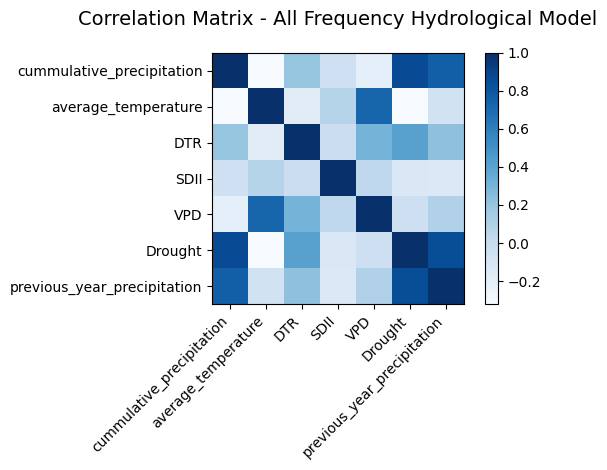

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_all_frequency_hydrological_model.jpeg


In [ ]:
cor_afH_matrix=x_afH.corr()
# plotting correlation matrix
plt.imshow(cor_afH_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_afH_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_afH_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_afH_matrix)), variables)
plt.title('Correlation Matrix - All Frequency Hydrological Model',fontsize=14,pad=20)


jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_all_frequency_hydrological_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")

Calculate feature importance

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all_frequency_hydrological_model_feature_importance.jpeg"

# --- GINI IMPORTANCE PLOT ---
feature_names_afHr = afHr.feature_names_in_
importances_afHr = afHr.feature_importances_

feature_imp_df_afHr = pd.DataFrame({
    'Feature': feature_names_afHr,
    'Gini Importance': importances_afHr
}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afHr['Feature'], feature_imp_df_afHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Gini Importance - ALL Frequency Hydrological Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()

# --- SHAP SUMMARY PLOT ---
explainer_afH = shap.Explainer(afHr)
shap_values_afH = explainer_afH.shap_values(x_afH)

# Create SHAP plot and save
shap.summary_plot(shap_values_afH, x_afH, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - ALL Frequency Hydrological Model")
plt.tight_layout()
plt.savefig(shap_path, dpi=300, format='jpeg')
plt.close()

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")


✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all_frequency_hydrological_model_feature_importance.jpeg


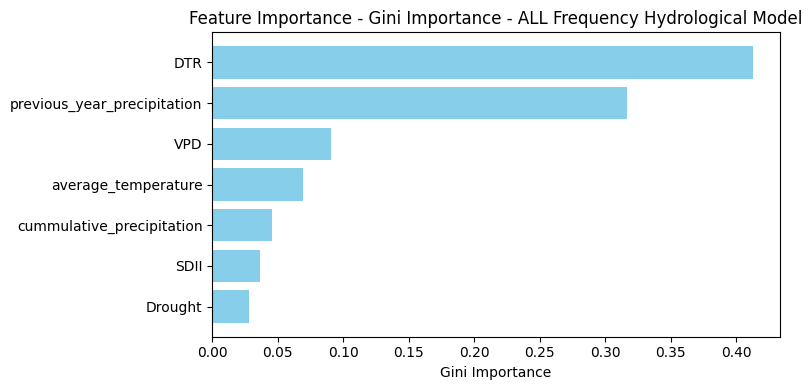

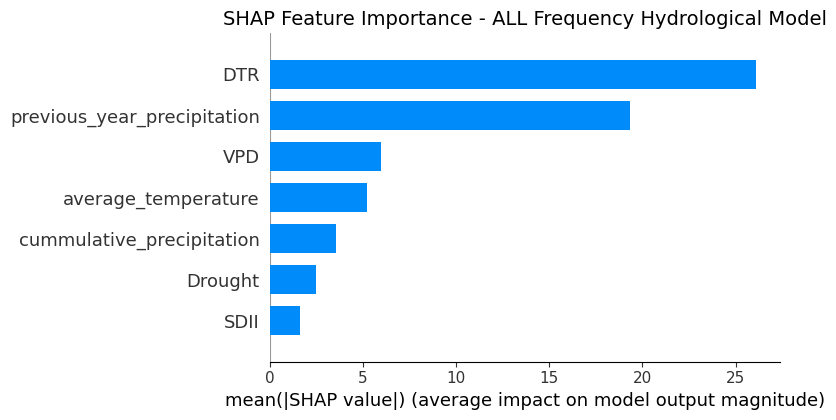

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/feature_importance_all_frequency_hydrological_model.jpeg


In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import shap
import pandas as pd

# Gini importance bar plot
feature_names_afHr = afHr.feature_names_in_
importances_afHr = afHr.feature_importances_

feature_imp_df_afHr = pd.DataFrame({
    'Feature': feature_names_afHr,
    'Gini Importance': importances_afHr
}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afHr['Feature'], feature_imp_df_afHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance - ALL Frequency Hydrological Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# SHAP bar summary plot with custom title
explainer_afH = shap.Explainer(afHr)
shap_values_afH = explainer_afH.shap_values(x_afH)

# Use show=False to manually modify the plot
shap.summary_plot(shap_values_afH, x_afH, plot_type="bar", show=False)

# Add a custom title using Matplotlib
plt.title("SHAP Feature Importance - ALL Frequency Hydrological Model", fontsize=14)

jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/feature_importance_all_frequency_hydrological_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


###Control Drought Irrigation ungrouped data

In [ ]:
CDI_ungrouped_df

,ID,Year,Treatment,Biomass,cummulative_precipitation,average_temperature,DTR,total_rainy_days,consecutive_dry_days,consecutive_rainy_days,number_of_rain_events,VPD,previous_year_precipitation,previous_year_DTR,previous_year_VPD,previous_year_rainy_days,SDII,previous year SDII,Drought,Frequency
449,11,2006,D,139.125,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
450,12,2006,D,42.15,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
451,13,2006,D,102.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
452,14,2006,D,208.025,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
453,15,2006,D,120.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,22E2,2024,C,165.16,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2141,22E3,2024,C,151.4,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2142,22E4,2024,C,145.92,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2143,22E5,2024,C,117.2,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF


In [ ]:
y_ugcdiH=CDI_ungrouped_df.iloc[:,3].fillna(0)
x_ugcdiH=CDI_ungrouped_df.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

x_ugcdiH.reset_index(drop=True,inplace=True)
y_ugcdiH.reset_index(drop=True,inplace=True)

x_train_ugcdiH, x_test_ugcdiH, y_train_ugcdiH, y_test_ugcdiH = train_test_split(x_ugcdiH, y_ugcdiH, test_size = 0.2)

ugcdiHr = RandomForestRegressor()
ugcdiHr.fit(x_train_ugcdiH, y_train_ugcdiH)
ugcdiH_predicts = ugcdiHr.predict(x_test_ugcdiH)

# Evaluating the model
mse = mean_squared_error(y_test_ugcdiH, ugcdiH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_ugcdiH, ugcdiH_predicts)
print(f'R-squared: {r2}')

#save results of current runtime
model_results = {
    "Model": "Control Drought Irrigation ungrouped",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)



<ipython-input-241-f2eda296f7b3>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_ugcdiH=CDI_ungrouped_df.iloc[:,3].fillna(0)


Mean Squared Error: 16059.08912406827
Root Mean Squared Error: 126.72446142741452
R-squared: 0.09867890950340774


###Control Drought Irrigation grouped model

---



In [ ]:
CDI_df

Biomass  cummulative_precipitation  average_temperature  \
Year Treatment                                                               
2006 C           173.49898                    419.800            13.749445   
     D          173.706373                    277.068            13.749445   
     I          153.024038                    599.800            13.749445   
2007 C          203.170588                    581.700            13.337655   
     D             254.979                    383.922            13.337655   
     I            201.8045                    761.700            13.337655   
2008 C          201.566667                    322.600            14.350498   
     D            206.6585                    212.916            14.350498   
     I              206.95                    502.600            14.350498   
2009 C            225.6125                    409.200            14.143390   
     D          153.945283                    270.072            14.143390   
     I             259.844                    589.200            14.143390   
2010 C              181.65                    528.600            15.638151   
     D          226.751471                    348.876            15.638151   
     I          217.118627                    708.600            15.638151   
2011 C               265.5                    350.900            15.472915   
     D              229.99                    231.594            15.472915   
     I              298.64                    530.900            15.472915   
2012 C               206.7                    566.000            12.785962   
     D               219.6                    373.560            12.785962   
     I               267.0                    746.000            12.785962   
2013 C               170.0                    426.600            15.027106   
     D               157.5                    281.556            15.027106   
     I               281.6                    606.600            15.027106   
2014 C             108.433                    601.200            14.777543   
     D             114.717                    396.792            14.777543   
     I             153.317                    781.200            14.777543   
2015 C               178.1                    778.500            14.734421   
     D               180.7                    513.810            14.734421   
2016 C               170.8                    503.800            15.678517   
     D               131.8                    332.508            15.678517   
2017 C               139.2                    293.700            14.585754   
     D               148.8                    193.842            14.585754   
2018 C           71.508185                    430.400            16.065582   
     D33         79.405874                    284.064            16.065582   
2019 C          161.060648                    675.900            13.964326   
     D33         169.40696                    446.094            13.964326   
2020 C            172.2604                    764.000            14.751339   
     D33        184.413714                    504.240            14.751339   
2021 C          171.790533                    612.600            16.011065   
2022 C           78.826533                    467.000            14.938611   
2023 C             61.5116                    747.800            15.316314   
2024 C          115.634667                    539.600            16.503787   

                      DTR  total_rainy_days  consecutive_dry_days  \
Year Treatment                                                      
2006 C           9.559919              26.0                  52.0   
     D           9.559919              26.0                  52.0   
     I           9.559919              26.0                  52.0   
2007 C          10.635186              30.0                 181.0   
     D          10.635186              30.0                 181.0   
     I          10.635186

In [ ]:
x_cdiH=CDI_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15]]
y_cdiH=CDI_df.iloc[:,0]
x_cdiH.reset_index(drop=True,inplace=True)
y_cdiH.reset_index(drop=True,inplace=True)

x_train_cdiH, x_test_cdiH, y_train_cdiH, y_test_cdiH = train_test_split(x_cdiH, y_cdiH, test_size = 0.2)

cdiHr = RandomForestRegressor()
cdiHr.fit(x_train_cdiH, y_train_cdiH)
cdiH_predicts = cdiHr.predict(x_test_cdiH)

# Evaluating the model
mse = mean_squared_error(y_test_cdiH, cdiH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_cdiH, cdiH_predicts)
print(f'R-squared: {r2}')

#save results of current runtime
model_results = {
    "Model": "Control Drought Irrigation Hydrological",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)




Mean Squared Error: 1708.2034005194482
Root Mean Squared Error: 41.33041737654543
R-squared: 0.371694873033826


In [ ]:
col_names=['N','Min','Max','Mean','Std.D','Variance','Cv%']
Training_data=[len(y_train_cdiH),min(y_train_cdiH),max(y_train_cdiH),np.mean(y_train_cdiH),np.std(y_train_cdiH),np.var(y_train_cdiH,ddof=1),cv(y_train_cdiH)]
Test_data=[len(y_test_cdiH),min(y_test_cdiH),max(y_test_cdiH),np.mean(y_test_cdiH),np.std(y_test_cdiH),np.var(y_test_cdiH,ddof=1),cv(y_test_cdiH)]
All_data= [len(y_cdiH),min(y_cdiH),max(y_cdiH),np.mean(y_cdiH),np.std(y_cdiH),np.var(y_cdiH,ddof=1),cv(y_cdiH)]
df_data_analysis=pd.DataFrame([Training_data,Test_data,All_data],columns=col_names)
df_data_analysis.index=['Training Data','Test Data','All Data']
df_data_analysis
excel_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/drought control irrigation grouped model data analysis.xlsx"

# Export the DataFrame
df_data_analysis.to_excel(excel_path, index=True)

print(f"Excel file saved to: {excel_path}")

Excel file saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/drought control irrigation grouped model data analysis.xlsx


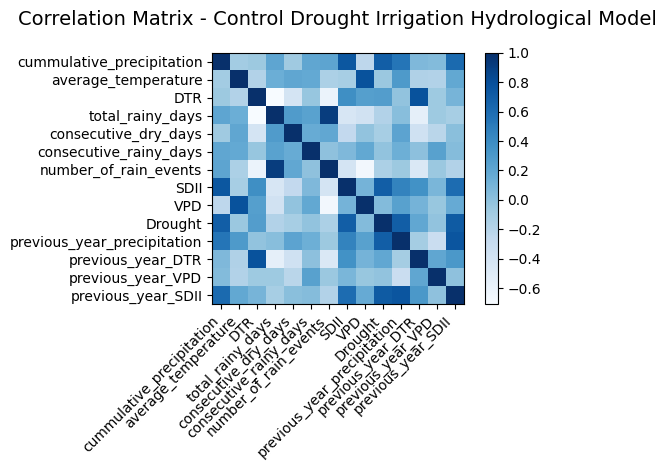

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_control_drought_irrigation_hydrological_model.jpeg


In [ ]:
cor_cdiH_matrix=x_cdiH.corr()
# plotting correlation matrix
plt.imshow(cor_cdiH_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_cdiH_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_cdiH_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_cdiH_matrix)), variables)
plt.title('Correlation Matrix - Control Drought Irrigation Hydrological Model',fontsize=14,pad=20)

jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_control_drought_irrigation_hydrological_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdiH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdiH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_irrgation_hydrological_model_feature_importance.jpeg"

# --- GINI IMPORTANCE PLOT ---
feature_names_afHr = afHr.feature_names_in_
importances_afHr = afHr.feature_importances_

feature_imp_df_afHr = pd.DataFrame({
    'Feature': feature_names_afHr,
    'Gini Importance': importances_afHr
}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afHr['Feature'], feature_imp_df_afHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Gini Importance - ALL Frequency Hydrological Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()

# --- SHAP SUMMARY PLOT ---
explainer_afH = shap.Explainer(afHr)
shap_values_afH = explainer_afH.shap_values(x_afH)

# Create SHAP plot and save
shap.summary_plot(shap_values_afH, x_afH, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - ALL Frequency Hydrological Model")
plt.tight_layout()
plt.savefig(shap_path, dpi=300, format='jpeg')
plt.close()

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")


✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_irrgation_hydrological_model_feature_importance.jpeg


In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdiH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdiH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_irrgation_hydrological_model_feature_importance.jpeg"


feature_names_cdiHr=cdiHr.feature_names_in_
importances_cdiHr= cdiHr.feature_importances_

feature_imp_df_cdiHr = pd.DataFrame({'Feature': feature_names_cdiHr, 'Gini Importance': importances_cdiHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_cdiHr['Feature'], feature_imp_df_cdiHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- Control Drought Irrigation Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()


explainer_cdiH = shap.Explainer(cdiHr)
shap_values_cdiH = explainer_cdiH.shap_values(x_cdiH)


# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_cdiH, x_cdiH, plot_type="bar", show=False)

# Get current figure and adjust padding
fig = plt.gcf()
fig.suptitle("SHAP Feature Importance - Control Drought Irrigation Hydrological Model", fontsize=14)

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")

✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_irrgation_hydrological_model_feature_importance.jpeg


###Control Drought ungrouped data

In [ ]:
control_drought_ungrouped_df

,ID,Year,Treatment,Biomass,cummulative_precipitation,average_temperature,DTR,total_rainy_days,consecutive_dry_days,consecutive_rainy_days,number_of_rain_events,VPD,previous_year_precipitation,previous_year_DTR,previous_year_VPD,previous_year_rainy_days,SDII,previous year SDII,Drought,Frequency
449,11,2006,D,139.125,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
450,12,2006,D,42.15,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
451,13,2006,D,102.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
452,14,2006,D,208.025,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
453,15,2006,D,120.35,277.068,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,247.962,9.563167,0.733940,20.0,10.656462,12.398100,0.66,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,22E2,2024,C,165.16,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2141,22E3,2024,C,151.4,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2142,22E4,2024,C,145.92,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF
2143,22E5,2024,C,117.2,539.600,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.800,9.816981,0.689479,30.0,17.406452,24.926667,1.00,NF


In [ ]:
y_ugcdH=control_drought_ungrouped_df.iloc[:,3].fillna(0)
x_ugcdH=control_drought_ungrouped_df.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

x_ugcdH.reset_index(drop=True,inplace=True)
y_ugcdH.reset_index(drop=True,inplace=True)

x_train_ugcdH, x_test_ugcdH, y_train_ugcdH, y_test_ugcdH = train_test_split(x_ugcdH, y_ugcdH, test_size = 0.2)

ugcdHr = RandomForestRegressor()
ugcdHr.fit(x_train_ugcdH, y_train_ugcdH)
ugcdH_predicts = ugcdHr.predict(x_test_ugcdH)

# Evaluating the model
mse = mean_squared_error(y_test_ugcdH, ugcdH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_ugcdH, ugcdH_predicts)
print(f'R-squared: {r2}')

#save results of current runtime
model_results = {
    "Model": "Control Drought ungrouped",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)




<ipython-input-249-99c7cdd7d69c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_ugcdH=control_drought_ungrouped_df.iloc[:,3].fillna(0)


Mean Squared Error: 7191.400038205431
Root Mean Squared Error: 84.80212284020625
R-squared: 0.2257826327144985


✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_ungrouped_hydrological_model_feature_importance.jpeg


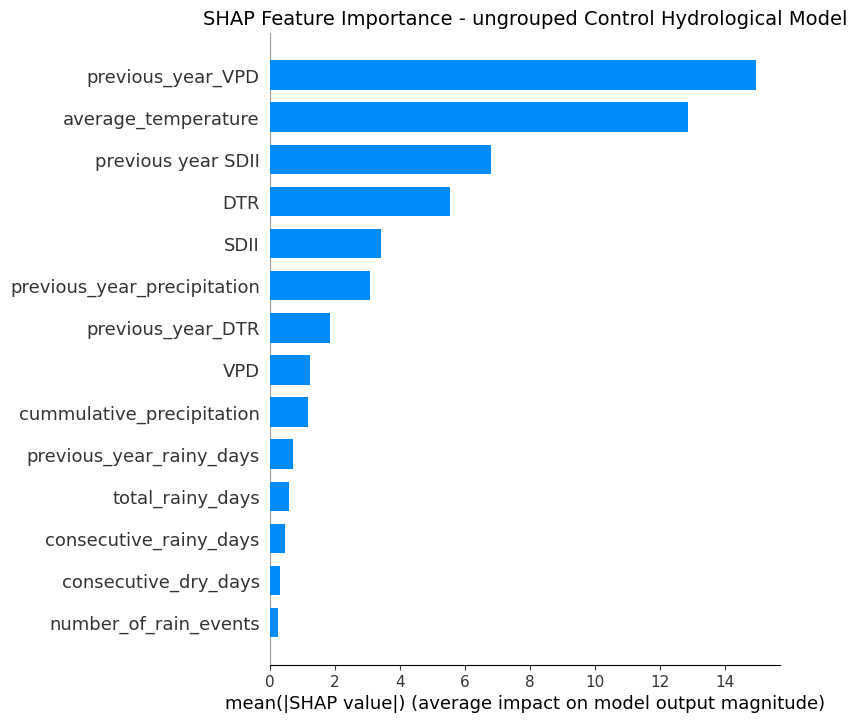

In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdugH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdugH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_ungrouped_hydrological_model_feature_importance.jpeg"


feature_names_ugcdHr=ugcdHr.feature_names_in_
importances_ugcdHr= ugcdHr.feature_importances_

feature_imp_df_ugcdHr = pd.DataFrame({'Feature': feature_names_ugcdHr, 'Gini Importance': importances_ugcdHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_ugcdHr['Feature'], feature_imp_df_ugcdHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance-Ungrouped Control Drought Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()

explainer_ugcdH = shap.Explainer(ugcdHr)
shap_values_ugcdH = explainer_ugcdH.shap_values(x_ugcdH)
shap.summary_plot(shap_values_ugcdH, x_ugcdH, plot_type="bar", show=False)

plt.title("SHAP Feature Importance - ungrouped Control Hydrological Model", fontsize=14)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_cdiH, x_cdiH, plot_type="bar", show=False)

# Get current figure and adjust padding
fig = plt.gcf()
fig.suptitle("SHAP Feature Importance - Control Drought Irrigation Hydrological Model", fontsize=14)

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")



###Control Drought grouped model

In [ ]:
cd_df

Biomass  cummulative_precipitation  average_temperature  \
Year Treatment                                                               
2006 C           173.49898                    419.800            13.749445   
     D          173.706373                    277.068            13.749445   
2007 C          203.170588                    581.700            13.337655   
     D             254.979                    383.922            13.337655   
2008 C          201.566667                    322.600            14.350498   
     D            206.6585                    212.916            14.350498   
2009 C            225.6125                    409.200            14.143390   
     D          153.945283                    270.072            14.143390   
2010 C              181.65                    528.600            15.638151   
     D          226.751471                    348.876            15.638151   
2011 C               265.5                    350.900            15.472915   
     D              229.99                    231.594            15.472915   
2012 C               206.7                    566.000            12.785962   
     D               219.6                    373.560            12.785962   
2013 C               170.0                    426.600            15.027106   
     D               157.5                    281.556            15.027106   
2014 C             108.433                    601.200            14.777543   
     D             114.717                    396.792            14.777543   
2015 C               178.1                    778.500            14.734421   
     D               180.7                    513.810            14.734421   
2016 C               170.8                    503.800            15.678517   
     D               131.8                    332.508            15.678517   
2017 C               139.2                    293.700            14.585754   
     D               148.8                    193.842            14.585754   
2018 C           71.508185                    430.400            16.065582   
     D33         79.405874                    284.064            16.065582   
2019 C          161.060648                    675.900            13.964326   
     D33         169.40696                    446.094            13.964326   
2020 C            172.2604                    764.000            14.751339   
     D33        184.413714                    504.240            14.751339   
2021 C          171.790533                    612.600            16.011065   
2022 C           78.826533                    467.000            14.938611   
2023 C             61.5116                    747.800            15.316314   
2024 C          115.634667                    539.600            16.503787   

                      DTR  total_rainy_days  consecutive_dry_days  \
Year Treatment                                                      
2006 C           9.559919              26.0                  52.0   
     D           9.559919              26.0                  52.0   
2007 C          10.635186              30.0                 181.0   
     D          10.635186              30.0                 181.0   
2008 C          12.253657              18.0                 157.0   
     D          12.253657              18.0                 157.0   
2009 C          11.631167              25.0                  32.0   
     D          11.631167              25.0                  32.0   
2010 C          11.808651              27.0                  25.0   
     D          11.808651              27.0                  25.0   
2011 C          11.715882              27.0                 180.0   
     D          11.715882              27.0                 180.0   
2012 C          11.537472              26.0                  51.0   
     D          11.537472              26.0                  51.0   
2013 C          11.419807              22.0                 239.0   
     D          11.419807            

In [ ]:
x_cdH=cd_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15]]
y_cdH=cd_df.iloc[:,0]
x_cdH.reset_index(drop=True,inplace=True)
y_cdH.reset_index(drop=True,inplace=True)

x_train_cdH, x_test_cdH, y_train_cdH, y_test_cdH = train_test_split(x_cdH, y_cdH, test_size = 0.2)

cdHr = RandomForestRegressor()
cdHr.fit(x_train_cdH, y_train_cdH)
cdH_predicts = cdHr.predict(x_test_cdH)

# Evaluating the model
mse = mean_squared_error(y_test_cdH, cdH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_cdH, cdH_predicts)
print(f'R-squared: {r2}')

model_results = {
    "Model": "Control Drought Hydrological",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)





Mean Squared Error: 2026.295996063932
Root Mean Squared Error: 45.014397653016886
R-squared: 0.31953171003720404


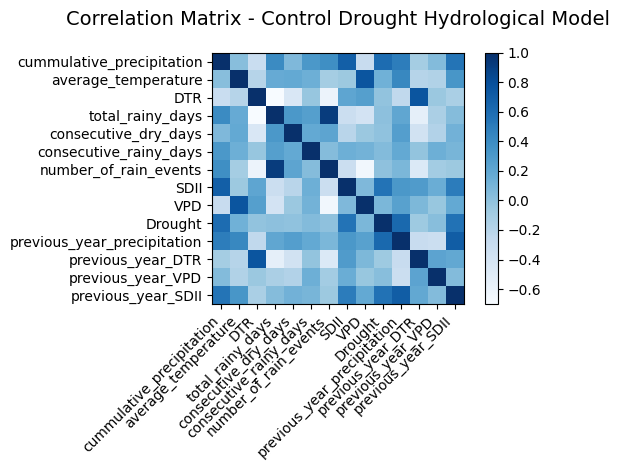

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_control_drought_hydrological_model.jpeg


In [ ]:
cor_cdH_matrix=x_cdH.corr()
# plotting correlation matrix
plt.imshow(cor_cdH_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_cdH_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_cdH_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_cdH_matrix)), variables)
plt.title('Correlation Matrix - Control Drought Hydrological Model',fontsize=14,pad=20)

jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_control_drought_hydrological_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_hydrological_model_feature_importance.jpeg"


feature_names_cdHr=cdHr.feature_names_in_
importances_cdHr= cdHr.feature_importances_

feature_imp_df_cdHr = pd.DataFrame({'Feature': feature_names_cdHr, 'Gini Importance': importances_cdHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_cdHr['Feature'], feature_imp_df_cdHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- Control Drought Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()

explainer_cdH = shap.Explainer(cdHr)
shap_values_cdH = explainer_cdiH.shap_values(x_cdH)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_cdH, x_cdH, plot_type="bar",show=False)


# Get current figure and adjust padding
fig = plt.gcf()
plt.title("SHAP Feature Importance - Control Drought Hydrological Model", fontsize=14)

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")





✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/control_drought_hydrological_model_feature_importance.jpeg


###Control ungrouped model

In [ ]:
control_ungrouped_df

,ID,Year,Treatment,Biomass,cummulative_precipitation,average_temperature,DTR,total_rainy_days,consecutive_dry_days,consecutive_rainy_days,number_of_rain_events,VPD,previous_year_precipitation,previous_year_DTR,previous_year_VPD,previous_year_rainy_days,SDII,previous year SDII,Drought,Frequency
500,21,2006,C,220.475,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,375.7,9.563167,0.733940,20.0,16.146154,18.785000,1.0,NF
501,22,2006,C,196.075,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,375.7,9.563167,0.733940,20.0,16.146154,18.785000,1.0,NF
502,23,2006,C,104.6,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,375.7,9.563167,0.733940,20.0,16.146154,18.785000,1.0,NF
503,24,2006,C,155.9,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,375.7,9.563167,0.733940,20.0,16.146154,18.785000,1.0,NF
504,25,2006,C,42.525,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,0.645289,375.7,9.563167,0.733940,20.0,16.146154,18.785000,1.0,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,22E2,2024,C,165.16,539.6,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.8,9.816981,0.689479,30.0,17.406452,24.926667,1.0,NF
2141,22E3,2024,C,151.4,539.6,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.8,9.816981,0.689479,30.0,17.406452,24.926667,1.0,NF
2142,22E4,2024,C,145.92,539.6,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.8,9.816981,0.689479,30.0,17.406452,24.926667,1.0,NF
2143,22E5,2024,C,117.2,539.6,16.503787,10.288732,31.0,35.0,5.0,22.0,0.765912,747.8,9.816981,0.689479,30.0,17.406452,24.926667,1.0,NF


In [ ]:
y_ugcH=control_ungrouped_df.iloc[:,3].fillna(0)
x_ugcH=control_ungrouped_df.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

x_ugcH.reset_index(drop=True,inplace=True)
y_ugcH.reset_index(drop=True,inplace=True)

x_train_ugcH, x_test_ugcH, y_train_ugcH, y_test_ugcH = train_test_split(x_ugcH, y_ugcH, test_size = 0.2)

ugcHr = RandomForestRegressor()
ugcHr.fit(x_train_ugcH, y_train_ugcH)
ugcH_predicts = ugcHr.predict(x_test_ugcH)

# Evaluating the model
mse = mean_squared_error(y_test_ugcH, ugcH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_ugcH, ugcH_predicts)
print(f'R-squared: {r2}')

model_results = {
    "Model": "Control ungrouped",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)





<ipython-input-256-9e3521e88766>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_ugcH=control_ungrouped_df.iloc[:,3].fillna(0)


Mean Squared Error: 7532.140718894203
Root Mean Squared Error: 86.78790652443578
R-squared: 0.19202776739498562


###Control data model

In [ ]:
control_df

,,Biomass,cummulative_precipitation,average_temperature,DTR,total_rainy_days,consecutive_dry_days,consecutive_rainy_days,number_of_rain_events,SDII,VPD,Drought,Frequency,previous_year_precipitation,previous_year_DTR,previous_year_VPD,previous_year_SDII,previous_year_rainy_days
Year,Treatment,,,,,,,,,,,,,,,,,
2006,C,173.49898,419.8,13.749445,9.559919,26.0,52.0,5.0,16.0,16.146154,0.645289,1.0,NF,375.7,9.563167,0.733940,18.785000,20.0
2007,C,203.170588,581.7,13.337655,10.635186,30.0,181.0,4.0,22.0,19.390000,0.564263,1.0,NF,419.8,9.559919,0.645289,16.146154,26.0
2008,C,201.566667,322.6,14.350498,12.253657,18.0,157.0,4.0,13.0,17.922222,0.705677,1.0,NF,581.7,10.635186,0.564263,19.390000,30.0
2009,C,225.6125,409.2,14.143390,11.631167,25.0,32.0,4.0,19.0,16.368000,0.623728,1.0,NF,322.6,12.253657,0.705677,17.922222,18.0
2010,C,181.65,528.6,15.638151,11.808651,27.0,25.0,5.0,16.0,19.577778,0.782220,1.0,NF,409.2,11.631167,0.623728,16.368000,25.0
2011,C,265.5,350.9,15.472915,11.715882,27.0,180.0,8.0,15.0,12.996296,0.798975,1.0,NF,528.6,11.808651,0.782220,19.577778,27.0
2012,C,206.7,566.0,12.785962,11.537472,26.0,51.0,6.0,19.0,21.769231,0.601569,1.0,NF,350.9,11.715882,0.798975,12.996296,27.0
2013,C,170.0,426.6,15.027106,11.419807,22.0,239.0,5.0,14.0,19.390909,0.740023,1.0,NF,566.0,11.537472,0.601569,21.769231,26.0
2014,C,108.433,601.2,14.777543,12.342174,16.0,47.0,6.0,9.0,37.575000,0.787767,1.0,NF,426.6,11.419807,0.740023,19.390909,22.0


In [ ]:
x_cH=control_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15]]
y_cH=control_df.iloc[:,0]
x_cH.reset_index(drop=True,inplace=True)
y_cH.reset_index(drop=True,inplace=True)

x_train_cH, x_test_cH, y_train_cH, y_test_cH = train_test_split(x_cH, y_cH, test_size = 0.2)

cHr = RandomForestRegressor()
cHr.fit(x_train_cH, y_train_cH)
cH_predicts = cHr.predict(x_test_cH)

# Evaluating the model
mse = mean_squared_error(y_test_cH, cH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_cH, cH_predicts)
print(f'R-squared: {r2}')

model_results = {
    "Model": "Control Hydrological",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)




Mean Squared Error: 2572.4380918824113
Root Mean Squared Error: 50.719208312851364
R-squared: 0.17709700559518438


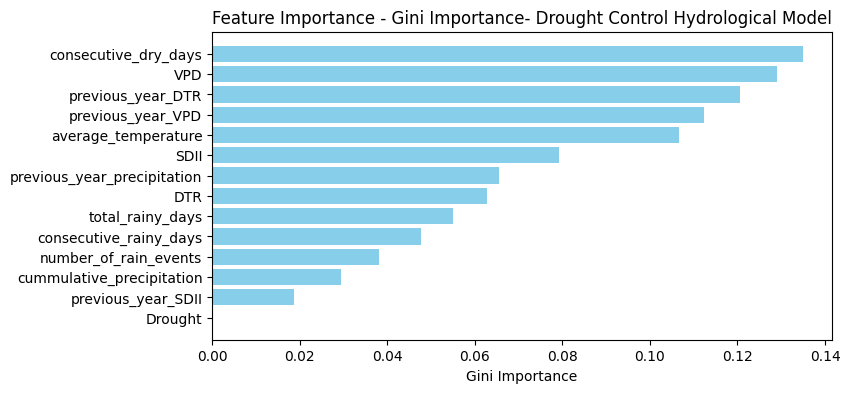

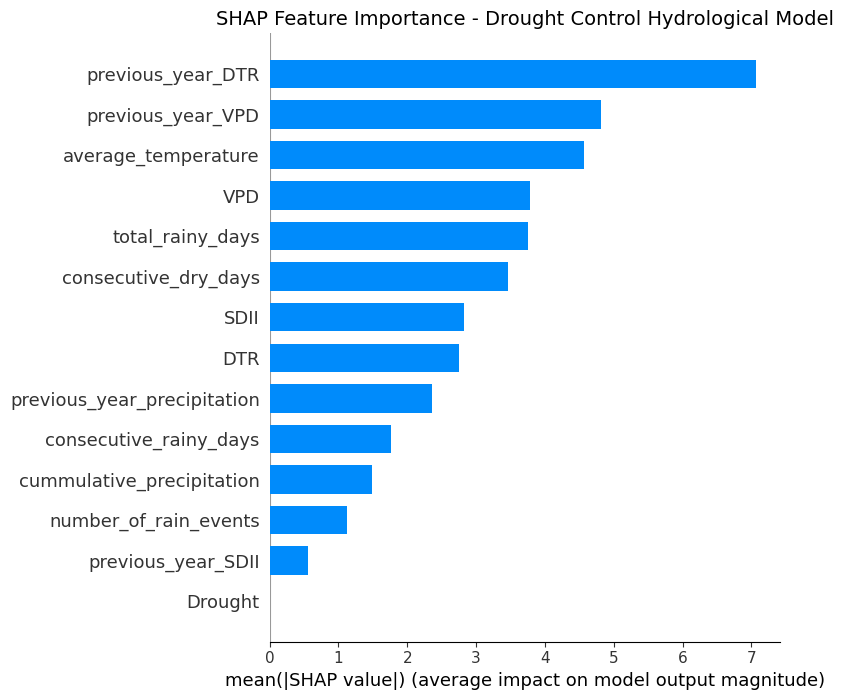

In [ ]:
feature_names_cHr=cHr.feature_names_in_
importances_cHr= cHr.feature_importances_

feature_imp_df_cHr = pd.DataFrame({'Feature': feature_names_cHr, 'Gini Importance': importances_cHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_cHr['Feature'], feature_imp_df_cHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- Drought Control Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

explainer_cH = shap.Explainer(cHr)
shap_values_cH = explainer_cH.shap_values(x_cH)
shap.summary_plot(shap_values_cH, x_cH, plot_type="bar",show=False)
plt.title("SHAP Feature Importance - Drought Control Hydrological Model", fontsize=14)

# Final layout adjustments and display
plt.tight_layout()
plt.show()


###Natural Frequency Model

In [ ]:
nf_values_df.drop(columns=['Frequency'],inplace=True)

<ipython-input-260-7b79cd58fdfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_values_df.drop(columns=['Frequency'],inplace=True)


In [ ]:
nf_values_df

Biomass  cummulative_precipitation  average_temperature  \
Year Treatment                                                               
2006 C           173.49898                    419.800            13.749445   
     D          173.706373                    277.068            13.749445   
     I          153.024038                    599.800            13.749445   
2007 C          203.170588                    581.700            13.337655   
     D             254.979                    383.922            13.337655   
     I            201.8045                    761.700            13.337655   
2008 C          201.566667                    322.600            14.350498   
     D            206.6585                    212.916            14.350498   
     I              206.95                    502.600            14.350498   
2009 C            225.6125                    409.200            14.143390   
     D          153.945283                    270.072            14.143390   
     I             259.844                    589.200            14.143390   
2010 C              181.65                    528.600            15.638151   
     D          226.751471                    348.876            15.638151   
     I          217.118627                    708.600            15.638151   
2011 C               265.5                    350.900            15.472915   
     D              229.99                    231.594            15.472915   
     I              298.64                    530.900            15.472915   
2012 C               206.7                    566.000            12.785962   
     D               219.6                    373.560            12.785962   
     I               267.0                    746.000            12.785962   
2013 C               170.0                    426.600            15.027106   
     D               157.5                    281.556            15.027106   
     I               281.6                    606.600            15.027106   
2014 C             108.433                    601.200            14.777543   
     D             114.717                    396.792            14.777543   
     I             153.317                    781.200            14.777543   
2015 C               178.1                    778.500            14.734421   
     D               180.7                    513.810            14.734421   
2016 C               170.8                    503.800            15.678517   
     D               131.8                    332.508            15.678517   
2017 C               139.2                    293.700            14.585754   
     D               148.8                    193.842            14.585754   
2018 C           71.508185                    430.400            16.065582   
     D33         79.405874                    284.064            16.065582   
2019 C          161.060648                    675.900            13.964326   
     D33         169.40696                    446.094            13.964326   
2020 C            172.2604                    764.000            14.751339   
     D33        184.413714                    504.240            14.751339   
     D66            184.97                    252.120            14.751339   
2021 C          171.790533                    612.600            16.011065   
     D66-NF     137.736267                    202.158            16.011065   
2022 C           78.826533                    467.000            14.938611   
     D66-NF      68.363333                    154.110            14.938611   
2023 C             61.5116                    747.800            15.316314   
     D66-NF      54.741467                    246.774            15.316314   
2024 C          115.634667                    539.600            16.503787   
     D66-NF      83.393333                    178.068            16.503787   

                      DTR  total_rainy_days  consecutive_dry_days  \
Year Treatment                                   

In [ ]:


x_nfH=nf_values_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
y_nfH=nf_values_df.iloc[:,0]
x_nfH.reset_index(drop=True,inplace=True)
y_nfH.reset_index(drop=True,inplace=True)

x_train_nfH, x_test_nfH, y_train_nfH, y_test_nfH = train_test_split(x_nfH, y_nfH, test_size = 0.2)

nfHr = RandomForestRegressor()
nfHr.fit(x_train_nfH, y_train_nfH)
nfH_predicts = nfHr.predict(x_test_nfH)

# Evaluating the model
mse = mean_squared_error(y_test_nfH, nfH_predicts)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_nfH, nfH_predicts)
print(f'R-squared: {r2}')

model_results = {
    "Model": "Natural Frequency Hydrological",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)





Mean Squared Error: 1297.9812375224124
Root Mean Squared Error: 36.02750667923625
R-squared: 0.7079299284117124


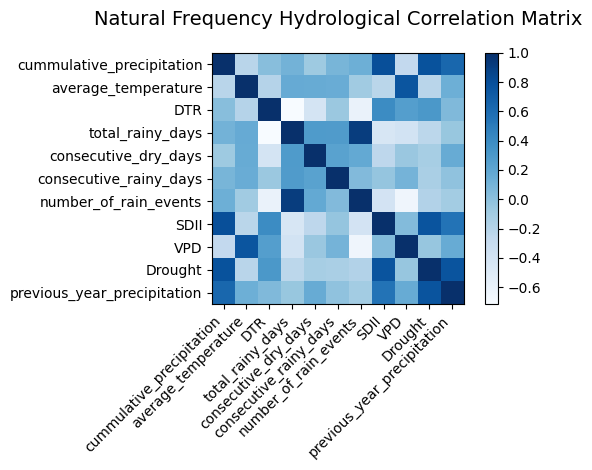

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_natural_frequency_hydrological_model.jpeg


In [ ]:
cor_nfH_matrix=x_nfH.corr()
# plotting correlation matrix
plt.imshow(cor_nfH_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_nfH_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_nfH_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_nfH_matrix)), variables)

plt.title("Natural Frequency Hydrological Correlation Matrix", fontsize=14, pad=20)


# Display the plot
jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_natural_frequency_hydrological_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


the r-squared was maximized when all indices were included

In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfH_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfH_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/natural_frequency_hydrological_model_feature_importance.jpeg"



feature_names_nfHr=nfHr.feature_names_in_
importances_nfHr= nfHr.feature_importances_

feature_imp_df_nfHr = pd.DataFrame({'Feature': feature_names_nfHr, 'Gini Importance': importances_nfHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_nfHr['Feature'], feature_imp_df_nfHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance-Natural Frequency Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()


explainer_nfH = shap.Explainer(nfHr)
shap_values_nfH = explainer_nfH.shap_values(x_nfH)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_nfH, x_nfH, plot_type="bar", show=False)

# Get current figure and adjust padding
fig = plt.gcf()
plt.title("SHAP Feature Importance - Natural Frequency Hydrological Model", fontsize=14)

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")





✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/natural_frequency_hydrological_model_feature_importance.jpeg


##Model trained on Seasonal Climate Indices

##Seasonal comparison

In [ ]:
seasonal_comp={'mean': nf_values_seasonal.mean(),'coeffeciant_of_variation':cv(nf_values_seasonal)}
seasonal_comp_df=pd.DataFrame(seasonal_comp)
biomass_rows = ['Biomass|Autumn', 'Biomass|Spring', 'Biomass|Winter']
if all(row in seasonal_comp_df.index for row in biomass_rows):
    biomass_values = seasonal_comp_df.loc[biomass_rows[0]]  # Use any of the identical rows
    seasonal_comp_df.loc['Biomass'] = biomass_values        # Add new combined row

# Step 2: Drop the old 'Biomass|...' rows
seasonal_comp_df.drop(index=biomass_rows, errors='ignore', inplace=True)

# Step 3: Drop all 'Drought|...' rows
drought_rows = [idx for idx in seasonal_comp_df.index if idx.startswith('Drought|')]
seasonal_comp_df.drop(index=drought_rows, errors='ignore', inplace=True)
new_order = ['Biomass'] + [idx for idx in seasonal_comp_df.index if idx != 'Biomass']
seasonal_comp_df = seasonal_comp_df.loc[new_order]



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
seasonal_comp_df

,mean,coeffeciant_of_variation
Biomass,172.14404,145.879698
DTR|Autumn,10.50856,5.568311
DTR|Spring,11.517902,5.720004
DTR|Winter,8.345519,4.504567
SDII|Autumn,14.988067,39.797222
SDII|Spring,16.621122,39.021574
SDII|Winter,18.802585,19.091684
VPD|Autumn,0.89747,0.441522
VPD|Spring,0.824154,0.383414
VPD|Winter,0.481423,0.182187


In [ ]:
pip install xlsxwriter

In [ ]:
import pandas as pd
import os

# Save path inside Google Drive
save_dir = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results"
os.makedirs(save_dir, exist_ok=True)

# Full file path
excel_path = os.path.join(save_dir, "seasonal_comparison.xlsx")

# Save DataFrame with title in the first row
with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    seasonal_comp_df.to_excel(writer, sheet_name='Sheet1', startrow=1)
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']
    worksheet.write('A1', 'Seasonal Comparison')

print(f"Excel file saved to: {excel_path}")


Excel file saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/seasonal_comparison.xlsx


###All Frequency Model

In [ ]:

merged_seasonal_grouped.drop(columns=['Biomass|Spring','Biomass|Winter','Drought|Spring','Drought|Winter','Frequency|Spring','Frequency|Winter'],inplace=True)
merged_seasonal_grouped= merged_seasonal_grouped.rename(columns={'Biomass|Autumn':'Biomass','Drought|Autumn':'Drought','Frequency|Autumn':'Frequency' })
reorder=[0,4,5,1,2,3]+list(range(6,len(merged_seasonal_grouped.columns)))
merged_seasonal_grouped=merged_seasonal_grouped.iloc[:,reorder]

frequency_mapping = {0:'NF', 2:'HF', 1:'LF'}
merged_seasonal_grouped['Frequency'] = merged_seasonal_grouped['Frequency'].map(frequency_mapping)


use one hot encoding on frequency values

In [ ]:
df_encoded_seasonal=pd.get_dummies(merged_seasonal_grouped, columns=['Frequency'], drop_first=True)
df_encoded_seasonal['Frequency_LF']=pd.to_numeric(df_encoded_seasonal['Frequency_LF'], errors='coerce')
df_encoded_seasonal['Frequency_NF']=pd.to_numeric(df_encoded_seasonal['Frequency_NF'], errors='coerce')


In [ ]:
indices=[1,3,4,6,7,8,9,10,12,13,20,21,22]
x_afS=df_encoded_seasonal.iloc[:,indices]
y_afS=df_encoded_seasonal.iloc[:,0]
x_afS.reset_index(drop=True,inplace=True)
y_afS.reset_index(drop=True,inplace=True)

x_train_afS, x_test_afS, y_train_afS, y_test_afS = train_test_split(x_afS, y_afS, test_size = 0.2)
afSr = RandomForestRegressor()
afSr.fit(x_train_afS, y_train_afS)
predictions_afS = afSr.predict(x_test_afS)

# Evaluating the model
mse = mean_squared_error(y_test_afS, predictions_afS)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_afS, predictions_afS)
print(f'R-squared: {r2}')

model_results = {
    "Model": "All Frequency Seasonal",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)




Mean Squared Error: 2701.2894798225725
Root Mean Squared Error: 51.973930771325854
R-squared: 0.09431994534370014


Create Correlation Matrix

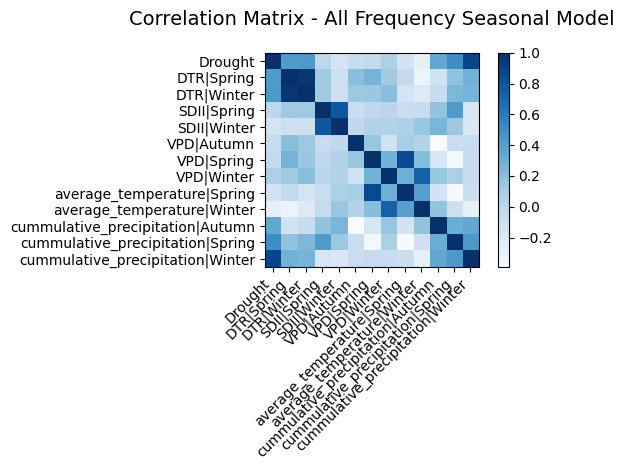

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_all_frequency_seasonal_model.jpeg


In [ ]:
cor_afS_matrix=x_afS.corr()
# plotting correlation matrix
plt.imshow(cor_afS_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_afS_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_afS_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_afS_matrix)), variables)
plt.title('Correlation Matrix - All Frequency Seasonal Model',fontsize=14,pad=20)

# Display the plot
jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_all_frequency_seasonal_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afS_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afS_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all_frequency_seasonal_model_feature_importance.jpeg"


feature_names_afSr=afSr.feature_names_in_
importances_afSr= afSr.feature_importances_

feature_imp_df_afSr = pd.DataFrame({'Feature': feature_names_afSr, 'Gini Importance': importances_afSr}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afSr['Feature'], feature_imp_df_afSr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- All Frequency Seasonal Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg')
plt.close()

# Create the explainer and SHAP values
explainer_afSr = shap.Explainer(afSr)
shap_values_afSr = explainer_afSr.shap_values(x_afS)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_afSr, x_afS, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - All Frequency Seasonal Model", fontsize=14)

# Get current figure and adjust padding
fig = plt.gcf()

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")






✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all_frequency_seasonal_model_feature_importance.jpeg


In [ ]:
nf_values_df.to_csv("/content/drive/MyDrive/Colab Notebooks/darya_data.csv")

###Natural Frequency Model

In [ ]:
nf_values_seasonal

Biomass|Autumn Biomass|Spring Biomass|Winter  DTR|Autumn  \
Year Treatment                                                            
2004 C               138.8085       138.8085       138.8085   10.599344   
     D                144.976        144.976        144.976   10.599344   
     I               237.8605       237.8605       237.8605   10.599344   
2006 C              173.49898      173.49898      173.49898    9.387500   
     D             173.706373     173.706373     173.706373    9.387500   
     I             153.024038     153.024038     153.024038    9.387500   
2007 C             203.170588     203.170588     203.170588   10.297541   
     D                254.979        254.979        254.979   10.297541   
     I               201.8045       201.8045       201.8045   10.297541   
2008 C             201.566667     201.566667     201.566667   12.985574   
     D               206.6585       206.6585       206.6585   12.985574   
     I                 206.95         206.95         206.95   12.985574   
2009 C               225.6125       225.6125       225.6125   12.223333   
     D             153.945283     153.945283     153.945283   12.223333   
     I                259.844        259.844        259.844   12.223333   
2010 C                 181.65         181.65         181.65   12.077443   
     D             226.751471     226.751471     226.751471   12.077443   
     I             217.118627     217.118627     217.118627   12.077443   
2011 C                  265.5          265.5          265.5   13.950820   
     D                 229.99         229.99         229.99   13.950820   
     I                 298.64         298.64         298.64   13.950820   
2012 C                  206.7          206.7          206.7   12.208508   
     D                  219.6          219.6          219.6   12.208508   
     I                  267.0          267.0          267.0   12.208508   
2013 C                  170.0          170.0          170.0   12.059672   
     D                  157.5          157.5          157.5   12.059672   
     I                  281.6          281.6          281.6   12.059672   
2014 C                108.433        108.433        108.433   12.890984   
     D                114.717        114.717        114.717   12.890984   
     I                153.317        153.317        153.317   12.890984   
2015 C                  178.1          178.1          178.1    7.282117   
     D                  180.7          180.7          180.7    7.282117   
2016 C                  170.8          170.8          170.8    6.833569   
     D                  131.8          131.8          131.8    6.833569   
2017 C                  139.2          139.2          139.2    8.079330   
     D                  148.8          148.8          148.8    8.079330   
2018 C              71.508185      71.508185      71.508185    7.419439   
     D33            79.405874      79.405874      79.405874    7.419439   
2019 C             161.060648     161.060648     161.060648    6.788947   
     D33            169.40696      169.40696      169.40696    6.788947   
2020 C               172.2604       172.2604       172.2604    7.964360   
     D33           184.413714     184.413714     184.413714    7.964360   
     D66               184.97         184.97         184.97    7.964360   
2021 C             171.790533     171.790533     171.790533    7.761196   
     D66-NF        137.736267     137.736267     137.736267    7.761196   
2022 C              78.826533      78.826533      78.826533   11.432787   
     D66-NF         68.363333      68.363333      68.363333   11.432787   
2023 C                61.5116        61.5116        61.5116   10.236066   
     D66-NF         54.741467      54.741467      54.741467   10.236066   
2024 C             115.634667     115.634667     115.634667   12.167213   
     D66-NF         83.393333      83.393333      83.393333   12.167213   

                DTR|Spring  DTR|Winter 

In [ ]:
nf_values_seasonal.drop(columns=['Biomass|Spring','Biomass|Winter','Drought|Spring','Drought|Winter'],inplace=True)
nf_values_seasonal= nf_values_seasonal.rename(columns={'Biomass|Autumn':'Biomass','Drought|Autumn':'Drought','Frequency|Autumn':'Frequency' })
reorder=[0,4,1,2,3]+list(range(5,len(nf_values_seasonal.columns)))
nf_values_seasonal=nf_values_seasonal.iloc[:,reorder]


In [ ]:
indices_nf=[1,3,4,6,7,8,9,10,12,13,20,21,22]
x_seasonal_nf=nf_values_seasonal.iloc[:,indices]
y_seasonal_nf=nf_values_seasonal.iloc[:,0]
x_seasonal_nf.reset_index(drop=True,inplace=True)
y_seasonal_nf.reset_index(drop=True,inplace=True)

In [ ]:
x_train_nfS, x_test_nfS, y_train_nfS, y_test_nfS = train_test_split(x_seasonal_nf, y_seasonal_nf, test_size = 0.2)
nfSr = RandomForestRegressor()
nfSr.fit(x_train_nfS, y_train_nfS)
predictions_nfS = nfSr.predict(x_test_nfS)

# Evaluating the model
mse = mean_squared_error(y_test_nfS, predictions_nfS)
print(f'Mean Squared Error: {mse}')

rmse=math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test_nfS, predictions_nfS)
print(f'R-squared: {r2}')

model_results = {
    "Model": "Natural Frequency Seasonal",  # update for each run
    "Timestamp": pd.Timestamp.now(),
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

results_df = pd.concat([results_df, pd.DataFrame([model_results])], ignore_index=True)




Mean Squared Error: 1673.4926515656377
Root Mean Squared Error: 40.90834452242767
R-squared: 0.475984626190469


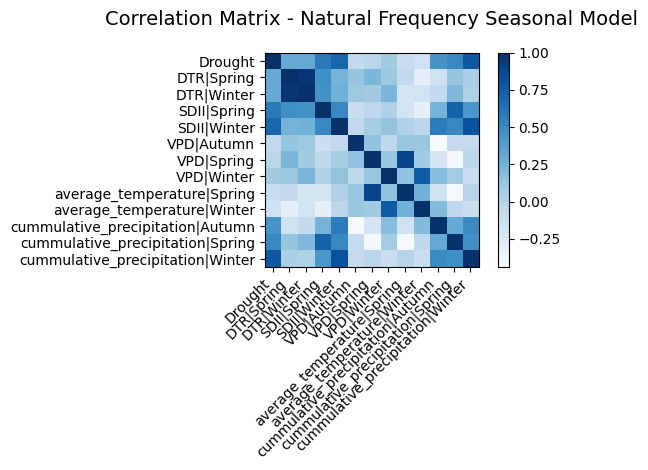

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_natural_frequency_seasonal_model.jpeg


In [ ]:
cor_nfS_matrix=x_seasonal_nf.corr()
# plotting correlation matrix
plt.imshow(cor_nfS_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_nfS_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_nfS_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_nfS_matrix)), variables)
plt.title('Correlation Matrix - Natural Frequency Seasonal Model',fontsize=14,pad=20)

# Display the plot
jpeg_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/correlation_matrix_natural_frequency_seasonal_model.jpeg"
plt.tight_layout()
plt.savefig(jpeg_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {jpeg_path}")


In [ ]:
# Paths
gini_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfS_gini_plot.jpeg"
shap_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfS_shap_plot.jpeg"
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/natural_frequency_seasonal_model_feature_importance.jpeg"



feature_names_nfSr=nfSr.feature_names_in_
importances_nfSr= nfSr.feature_importances_

feature_imp_df_nfSr = pd.DataFrame({'Feature': feature_names_nfSr, 'Gini Importance': importances_nfSr}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_nfSr['Feature'], feature_imp_df_nfSr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance -Natural Frequency Seasonal Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.savefig(gini_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.6)
plt.close()


explainer_nfSr = shap.Explainer(nfSr)
shap_values_nfSr = explainer_nfSr.shap_values(x_seasonal_nf)

# Create a new figure explicitly
fig, ax = plt.subplots(figsize=(8, 6))

# Create SHAP bar plot on this axis
shap.summary_plot(shap_values_nfSr, x_seasonal_nf, plot_type="bar",show=False)
plt.title("SHAP Feature Importance - Natural Frequency Seasonal Model", fontsize=14)

# Get current figure and adjust padding
fig = plt.gcf()

# Save with extended padding
fig.savefig(shap_path, dpi=300, format='jpeg', bbox_inches='tight', pad_inches=0.5)
plt.close(fig)

# --- COMBINE BOTH IMAGES ---
img1 = Image.open(gini_path)
img2 = Image.open(shap_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")







✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/natural_frequency_seasonal_model_feature_importance.jpeg


In [ ]:
#shap.dependence_plot('DTR|Winter',shap_values_nfSr, x_seasonal_nf)

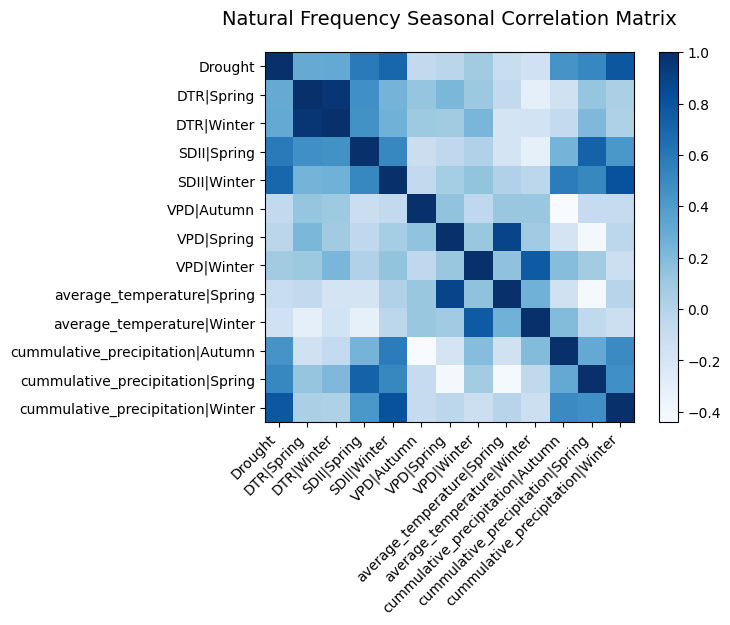

In [ ]:
cor_nfS_matrix=x_seasonal_nf.corr()
# plotting correlation matrix
plt.imshow(cor_nfS_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in cor_nfS_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(cor_nfS_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cor_nfS_matrix)), variables)

plt.title("Natural Frequency Seasonal Correlation Matrix", fontsize=14, pad=20)

# Display the plot
plt.show()

#Save results:

In [ ]:
excel_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/random_forest_model_evaluation.xlsx"
if os.path.exists(excel_path):
    # Load existing file and append
    with pd.ExcelWriter(excel_path, mode='a', if_sheet_exists='overlay', engine='openpyxl') as writer:
        # Load existing sheet
        existing_df = pd.read_excel(excel_path)
        # Find the start row
        start_row = len(existing_df) + 1
        results_df.to_excel(writer, index=False, header=False, startrow=start_row)
else:
    # Create new file
    results_df.to_excel(excel_path, index=False)

print(f"✅ Results saved to: {excel_path}")


✅ Results saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/random_forest_model_evaluation.xlsx


In [ ]:
from PIL import Image
import os
import math

# Set directory containing all the JPEGs
base_dir = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results"

# Get all Gini and SHAP plots
gini_files = sorted([os.path.join(base_dir, f) for f in os.listdir(base_dir) if f.endswith("gini_plot.jpeg")])
shap_files = sorted([os.path.join(base_dir, f) for f in os.listdir(base_dir) if f.endswith("shap_plot.jpeg")])

def combine_images_grid(image_paths, save_path, grid_cols=2):
    images = [Image.open(p) for p in image_paths]

    # Resize all images to the same size (uniform width and height)
    width = max(img.width for img in images)
    height = max(img.height for img in images)
    resized_images = [img.resize((width, height)) for img in images]

    grid_rows = math.ceil(len(resized_images) / grid_cols)
    combined_img = Image.new('RGB', (grid_cols * width, grid_rows * height), (255, 255, 255))

    for idx, img in enumerate(resized_images):
        row = idx // grid_cols
        col = idx % grid_cols
        combined_img.paste(img, (col * width, row * height))

    combined_img.save(save_path)
    print(f"✅ Grid image saved to: {save_path}")

# Set output paths
combined_gini_path = os.path.join(base_dir, "combined_gini_feature_importance.jpeg")
combined_shap_path = os.path.join(base_dir, "combined_shap_feature_importance.jpeg")

# Combine into grids
combine_images_grid(gini_files, combined_gini_path, grid_cols=2)
combine_images_grid(shap_files, combined_shap_path, grid_cols=2)


✅ Grid image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/combined_gini_feature_importance.jpeg
✅ Grid image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/combined_shap_feature_importance.jpeg


#Legacy Effect:

<ipython-input-98-5e1e929860e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_values_df['Biomass'] = pd.to_numeric(nf_values_df['Biomass'], errors='coerce')
<ipython-input-98-5e1e929860e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_values_df['cummulative_precipitation'] = pd.to_numeric(nf_values_df['cummulative_precipitation'], errors='coerce')
<ipython-input-98-5e1e929860e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

R-squared: 0.0520
P-value: 0.1192
Coefficients of cummulative precipitation and Biomass: [[0.07484737]]


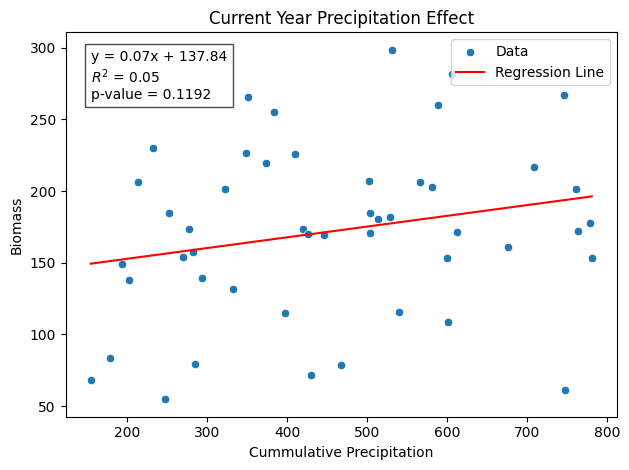

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Current_Year_precipitation_effect.jpeg


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Ensure numeric values
nf_values_df['Biomass'] = pd.to_numeric(nf_values_df['Biomass'], errors='coerce')
nf_values_df['cummulative_precipitation'] = pd.to_numeric(nf_values_df['cummulative_precipitation'], errors='coerce')

# Drop NaNs if needed
nf_values_df.dropna(subset=['Biomass', 'cummulative_precipitation'], inplace=True)

# Define X and Y
Y = nf_values_df[['Biomass']]
X = nf_values_df[['cummulative_precipitation']]

# Fit linear regression model
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(Y, Y_pred)

# Statsmodels for p-value
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
p_value = model_sm.pvalues[1]

# Print metrics
print(f"R-squared: {r_squared:.4f}")
if p_value < 0.0001:
    print(f"P-value: {p_value:.4e}")
else:
    print(f"P-value: {p_value:.4f}")
print(f"Coefficients of cummulative precipitation and Biomass: {model.coef_}")

# Plotting
sns.scatterplot(x=X['cummulative_precipitation'], y=Y['Biomass'], label="Data")
sns.lineplot(x=X['cummulative_precipitation'], y=Y_pred.flatten(), color='red', label="Regression Line")

# Add regression equation, R², and p-value
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Format p-value nicely
p_value_str = f"{p_value:.4e}" if p_value < 0.0001 else f"{p_value:.4f}"

equation = (
    f'y = {slope:.2f}x + {intercept:.2f}\n'
    f'$R^2$ = {r_squared:.2f}\n'
    f'p-value = {p_value_str}'
)

# Place equation box on plot
plt.text(
    x=X['cummulative_precipitation'].min(),
    y=Y['Biomass'].max(),
    s=equation,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7)
)

plt.title("Current Year Precipitation Effect")
plt.xlabel('Cummulative Precipitation')
plt.ylabel('Biomass')
plt.legend()
plt.tight_layout()
# Save path
curr_year_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Current_Year_precipitation_effect.jpeg"
plt.tight_layout()
plt.savefig(curr_year_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {curr_year_path}")


<ipython-input-99-a5ef3118c36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_values_df['Biomass'] = pd.to_numeric(nf_values_df['Biomass'], errors='coerce')
<ipython-input-99-a5ef3118c36f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_values_df['previous_year_precipitation'] = pd.to_numeric(nf_values_df['previous_year_precipitation'], errors='coerce')
<ipython-input-99-a5ef3118c36f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

R-squared: 0.0944
P-value: 0.0336
Coefficients of previous year precipitation and Biomass: [[0.10374126]]


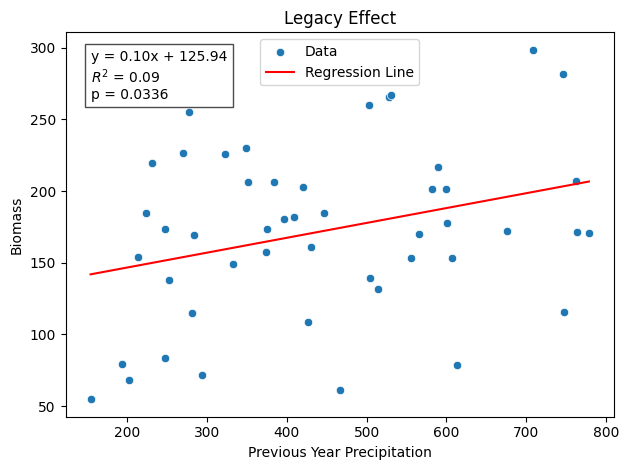

JPEG saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Previous_Year_precipitation_effect.jpeg


In [ ]:

# Ensure numeric values
nf_values_df['Biomass'] = pd.to_numeric(nf_values_df['Biomass'], errors='coerce')
nf_values_df['previous_year_precipitation'] = pd.to_numeric(nf_values_df['previous_year_precipitation'], errors='coerce')

# Drop rows with missing data
nf_values_df.dropna(subset=['Biomass', 'previous_year_precipitation'], inplace=True)

# Define X and Y
Y = nf_values_df[['Biomass']]
X = nf_values_df[['previous_year_precipitation']]

# Fit linear regression model
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(Y, Y_pred)

# Statsmodels for p-value
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
p_value = model_sm.pvalues[1]

# Print metrics
print(f"R-squared: {r_squared:.4f}")
if p_value < 0.0001:
    print(f"P-value: {p_value:.4e}")
else:
    print(f"P-value: {p_value:.4f}")
print(f"Coefficients of previous year precipitation and Biomass: {model.coef_}")

# Plotting
sns.scatterplot(x=X['previous_year_precipitation'], y=Y['Biomass'], label="Data")
sns.lineplot(x=X['previous_year_precipitation'], y=Y_pred.flatten(), color='red', label="Regression Line")

# Add regression equation, R², and p-value
slope = model.coef_[0][0]
intercept = model.intercept_[0]
p_value_str = f"{p_value:.4e}" if p_value < 0.0001 else f"{p_value:.4f}"

equation = (
    f'y = {slope:.2f}x + {intercept:.2f}\n'
    f'$R^2$ = {r_squared:.2f}\n'
    f'p = {p_value_str}'
)

# Annotate plot with equation box
plt.text(
    x=X['previous_year_precipitation'].min(),
    y=Y['Biomass'].max(),
    s=equation,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7)
)

plt.title("Legacy Effect")
plt.xlabel('Previous Year Precipitation')
plt.ylabel('Biomass')
plt.legend()

# Save path
prev_year_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Previous_Year_precipitation_effect.jpeg"
plt.tight_layout()
plt.savefig(prev_year_path, dpi=300, format='jpeg')
plt.show()

print(f"JPEG saved to: {prev_year_path}")



In [ ]:
# --- COMBINE BOTH IMAGES ---
combined_path = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Legacy_effect_comparision.jpeg"
img1 = Image.open(curr_year_path)
img2 = Image.open(prev_year_path)

# Resize to match widths
max_width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (max_width, total_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

combined_img.save(combined_path)
print(f"✅ Combined image saved to: {combined_path}")





✅ Combined image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/Legacy_effect_comparision.jpeg


#Reliability of the models:
All models consistently returned an non negative r-squared value , bacause of the level of randomness in the model creation this value varys across multiple runtimes but was generally larger then 0.5 in most models. this indicates the models capapilities of explaining over 50% in the variance in biomasss. All models were signifigantly better at predicting the biomass results then using the mean.

The points discussed in conclusions were consistent in all runtimes.

#Conclusions

#Feature Importance
The feature importance was analysed using SHAP and gini importance,

Gini Importance: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. The criterion is the Gini impurity, which measures the impurity of a node in a decision tree, with more substantial weight to the most important features. Therefore, Gini importance is also known as the total decrease in node impurity.

  SHAP values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction.

SHAP values are based on game theory and assign an importance value to each feature in a model. Features with positive SHAP values positively impact the prediction, while those with negative values have a negative impact. The magnitude is a measure of how strong the effect is.

the importance calculated by gini importance and by SHAP were highly similar. with differences only in the less important features of each model the similarity between the two importance calculations can be seen above with the model training

##Control Drought Irrigation Grouped variations:

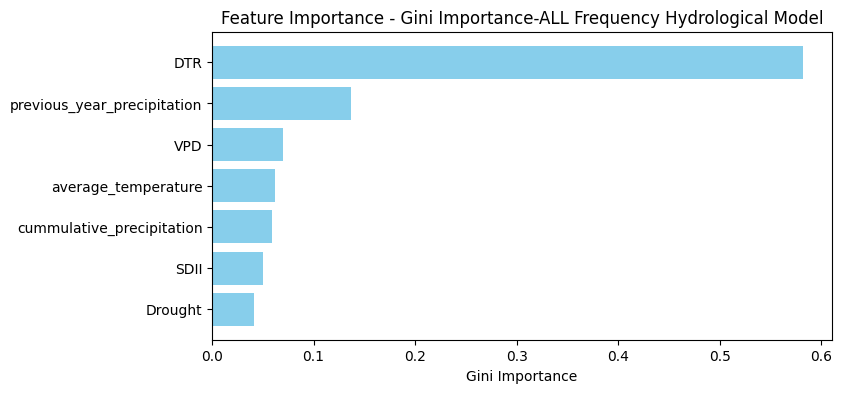

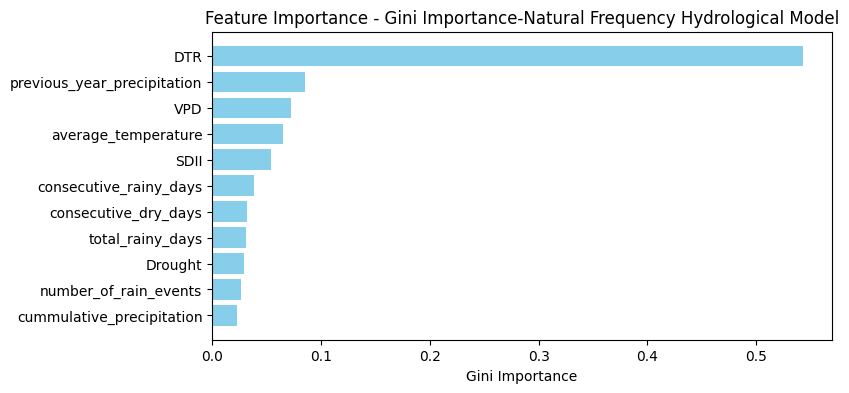

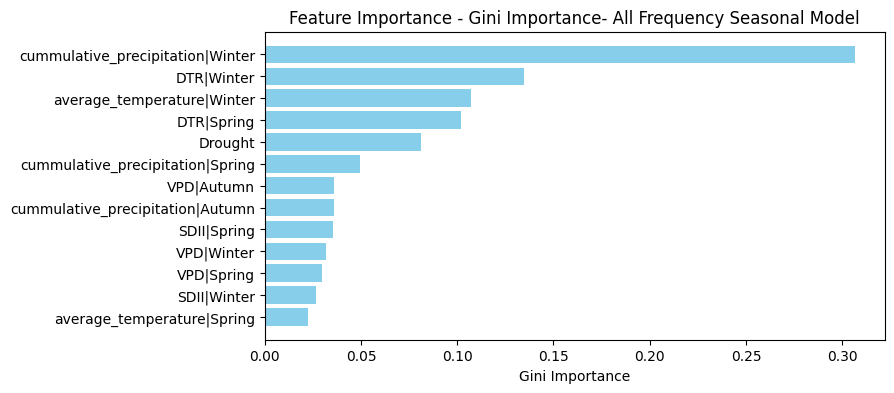

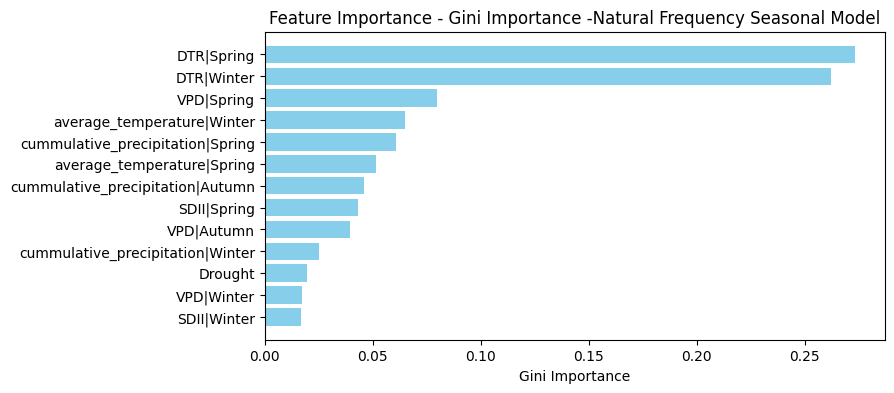

In [ ]:


feature_imp_df_cdiHr = pd.DataFrame({'Feature': feature_names_cdiHr, 'Gini Importance': importances_cdiHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_cdiHr['Feature'], feature_imp_df_cdiHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- Control Drought Irrigation Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

feature_imp_df_cdHr = pd.DataFrame({'Feature': feature_names_cdHr, 'Gini Importance': importances_cdHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_cdHr['Feature'], feature_imp_df_cdHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- Control Drought Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

feature_imp_df_afHr = pd.DataFrame({'Feature': feature_names_afHr, 'Gini Importance': importances_afHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afHr['Feature'], feature_imp_df_afHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance-ALL Frequency Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


feature_imp_df_nfHr = pd.DataFrame({'Feature': feature_names_nfHr, 'Gini Importance': importances_nfHr}).sort_values('Gini Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_nfHr['Feature'], feature_imp_df_nfHr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance-Natural Frequency Hydrological Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


feature_imp_df_afSr = pd.DataFrame({'Feature': feature_names_afSr, 'Gini Importance': importances_afSr}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_afSr['Feature'], feature_imp_df_afSr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance- All Frequency Seasonal Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


feature_imp_df_nfSr = pd.DataFrame({'Feature': feature_names_nfSr, 'Gini Importance': importances_nfSr}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df_nfSr['Feature'], feature_imp_df_nfSr['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance -Natural Frequency Seasonal Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



##Results and Conclusions:



**Daily Temperature Range**:

In the hydrological models in both the natural frequency and all frequency models the DTR had the highest importance.

In summation across all models the Daily Temperature Range had very high or highest signifigance. From a seasonal perspective the Spring and Winter daily temperature range had highest signifigance consistently.

Across all models the relationship between the DTR and the biomass was a positive one, increase in the DTR results in increase in the biomass, this gives an indication that during spring and winter months high temperatures followed by low temperatures have a positive effect on biomass whereas an increase in the average winter temperatures was shown to have a negative effect on biomass as can be seen in both the nf and the af seasonal scatterplots. furthermore we can see that the winter average temp was most signifigant off all seasonal average temps in all frequency model and spring and winter were similarly signifigant in the natural frequency model.

##Seasonal SHAP Summary ScatterPlot
Scatter plot explination:
Y-axis indicates the feature names in order of importance from top to bottom.
X-axis represents the SHAP value, which indicates the degree of change in log odds.
Each point represents a row of data from the original dataset.
The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.

In the below scatter plot we can see in the winter average temperature the blue points, low feature in this case low temperature points correspond to high SHAP values meaning they have a positive effect on biomass and the red points correspond with high temperature values have a negative effect on biomass.
Furthermore we can see an opposite directional correlation in the DTR high DTR has a positive effect on biomass and low DTR has a negative effect on biomass.

**Spring and Winter DTR**

in the Seasonal models the Spring DTR and Winter DTR were of high importance consistently, furthermore the cummulative precipitation of winter was consistently important in the all frequency model.


##All Frequency Model

In [ ]:
import shap
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_afSr, x_afS, show=False)
plt.title("SHAP Summary Plot for All Frequency Seasonal Model", fontsize=14)
plt.tight_layout()
fig1 = plt.gcf()  # get the current figure (shap uses its own internally)
fig1.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afS_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig1)

fig2, ax2 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_nfSr, x_seasonal_nf, show=False)
plt.title("SHAP Summary Plot for Natural Frequency Seasonal Model", fontsize=14)
plt.tight_layout()
fig2 = plt.gcf()
fig2.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfS_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig2)






##Hydrological Models

**Drought percentage:**

During the hydrological periods the drought level had the relativley high feature importance over other models, the correlation is identical in all the models a positive correlation between the percent of natural precipitation and the biomass. This is indicitive of the definition of a hydrological year or water year which takes into account months with the highest correlation between precipitation and negligible changes in storage (soil water).
The correlation was a positive correlation between percent of natural precipitation and Biomass in this model and all other models

**Daily Temperature Range:**

similar to the yearly models the for both hydrological models the daily temperature range was most important consistently and the correlation is a positive correlation, increase in the daily temperature range correlates with increase in the biomass.


## Hydrological SHAP Summary scatterplot

In [ ]:
# --- SHAP Plot: Natural Frequency Hydrological Model ---
fig1, ax1 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_nfH, x_nfH, show=False)
plt.title("SHAP Summary Plot for Natural Frequency Hydrological Model", fontsize=14)
plt.tight_layout()
fig1 = plt.gcf()
fig1.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/nfH_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig1)

# --- SHAP Plot: All Frequency Hydrological Model ---
fig2, ax2 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_afH, x_afH, show=False)
plt.title("SHAP Summary Plot for All Frequency Hydrological Model", fontsize=14)
plt.tight_layout()
fig2 = plt.gcf()
fig2.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/afH_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig2)





##Control Drought Irrigation Shap Scatterplot variations:

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- SHAP Plot: Control Drought Irrigation Hydrological Model ---
fig1, ax1 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_cdiH, x_cdiH, show=False)
plt.title("SHAP Summary Plot for Control Drought Irrigation Hydrological Model", fontsize=14)
plt.tight_layout()
fig1 = plt.gcf()
fig1.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdiH_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig1)

# --- SHAP Plot: Control Drought Hydrological Model ---
fig2, ax2 = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values_cdH, x_cdH, show=False)
plt.title("SHAP Summary Plot for Control Drought Hydrological Model", fontsize=14)
plt.tight_layout()
fig2 = plt.gcf()
fig2.savefig("/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/cdH_shap_summary.jpeg",
             format='jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close(fig2)


In [ ]:
import os
from PIL import Image

# Folder where SHAP summary JPEGs are saved
shap_folder = "/content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/"

# Collect all JPEG files that end with '_shap_summary.jpeg'
shap_files = sorted([f for f in os.listdir(shap_folder) if f.endswith('_shap_summary.jpeg')])
shap_paths = [os.path.join(shap_folder, f) for f in shap_files]

# Open all images
images = [Image.open(path) for path in shap_paths]

# Grid configuration
cols = 2
rows = 3

# Get max width and height among images
width = max(img.width for img in images)
height = max(img.height for img in images)

# Create a new blank image with white background
grid_img = Image.new('RGB', (cols * width, rows * height), color='white')

# Paste each image into the grid
for i, img in enumerate(images):
    x = (i % cols) * width
    y = (i // cols) * height
    grid_img.paste(img, (x, y))

# Save the final combined image
combined_shap_path = os.path.join(shap_folder, "all_models_shap_summary_grid.jpeg")
grid_img.save(combined_shap_path, format='JPEG', quality=95)

print(f"✅ Combined SHAP image saved to: {combined_shap_path}")


✅ Combined SHAP image saved to: /content/drive/MyDrive/Colab Notebooks/Matta_Model_Results/all_models_shap_summary_grid.jpeg
